# <h1> Import Data - E-Commerce Tokopedia </h1>


In [ ]:
#import library
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data
data = pd.read_csv('/content/drive/MyDrive/Data - Universitas Teknologi Yogyakarta /Data Science - Semester 8/dataset_skincare.csv')
data.head()

,product_name,product_sold,product_price,product_rating,product_loc,product_tok,product_harga_awal,product_pro1,product_pro2,url_gambar
0,BIOAQUA Skincare Paket Facial Whitening / Anti...,500+ terjual,Rp159.999,4.9,Tangerang,SOMETHINC Official,Rp599.999,73%,"Cashback 4,9rb",NaN
1,BIOAQUA 4pcs Skincare Paket Niacinamide Glowin...,250+ terjual,Rp109.999,4.9,Tangerang,SOMETHINC Official,Rp479.999,77%,"Cashback 8,4rb",NaN
2,BIOAQUA 7X Ceramide Skin Barrier Repair Moistu...,1 rb+ terjual,Rp89.999,4.9,Surabaya,Henusa Official Shop,Rp399.999,78%,Cashback 18rb,NaN
3,SOMETHINC BAKUCHIOL Skinpair Oil Serum,10rb+ terjual,Rp99.000,4.9,Bekasi,Srikandi Ayu,Rp109.000,9%,"Cashback 19,6rb",NaN
4,SOMETHINC CERAMIC SKIN Saviour Moisturizer Gel...,10rb+ terjual,Rp169.000,5.0,Jakarta Barat,IndoStainless,Rp186.000,9%,Cashback 20rb,NaN


## <h2> Data E-Commerce Tokopedia - Info </h2>


In [ ]:
data.shape

(3623, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        3623 non-null   object 
 1   product_sold        3513 non-null   object 
 2   product_price       3623 non-null   object 
 3   product_rating      3439 non-null   float64
 4   product_loc         3499 non-null   object 
 5   product_tok         3499 non-null   object 
 6   product_harga_awal  455 non-null    object 
 7   product_pro1        455 non-null    object 
 8   product_pro2        2211 non-null   object 
 9   url_gambar          0 non-null      float64
dtypes: float64(2), object(8)
memory usage: 283.2+ KB


In [ ]:
data.isnull().sum()

product_name             0
product_sold           110
product_price            0
product_rating         184
product_loc            124
product_tok            124
product_harga_awal    3168
product_pro1          3168
product_pro2          1412
url_gambar            3623
dtype: int64

In [ ]:
data.describe()

,product_rating,url_gambar
count,3439.000000,0.0
mean,4.942571,NaN
std,0.080262,NaN
min,4.000000,NaN
25%,4.900000,NaN
50%,5.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


# <h1> Data Prepocessing - Data Roots </h1>

## <h2> Delete Coloumn : product_name, url_gambar </h2>

In [ ]:
#kita lakukan sedikit data reduction yaitu menghilangkan id, krn tidak terpakai
data.drop(["product_name","url_gambar"], axis = 1, inplace=True)
data.head(10)

,product_sold,product_price,product_rating,product_loc,product_tok,product_harga_awal,product_pro1,product_pro2
0,500+ terjual,Rp159.999,4.9,Tangerang,SOMETHINC Official,Rp599.999,73%,"Cashback 4,9rb"
1,250+ terjual,Rp109.999,4.9,Tangerang,SOMETHINC Official,Rp479.999,77%,"Cashback 8,4rb"
2,1 rb+ terjual,Rp89.999,4.9,Surabaya,Henusa Official Shop,Rp399.999,78%,Cashback 18rb
3,10rb+ terjual,Rp99.000,4.9,Bekasi,Srikandi Ayu,Rp109.000,9%,"Cashback 19,6rb"
4,10rb+ terjual,Rp169.000,5.0,Jakarta Barat,IndoStainless,Rp186.000,9%,Cashback 20rb
5,100+ terjual,Rp55.000,5.0,Dilayani Tokopedia,TWOCARE x Muscle Nutrition,Rp295.000,5%,"Cashback 9,3rb"
6,80+ terjual,Rp180.000,4.9,Jakarta Utara,NPURE Official,Rp32.500,31%,"Cashback 11,2rb"
7,2rb+ terjual,Rp280.000,4.9,Jakarta Utara,NPURE Official,Rp130.000,27%,"Cashback 4,7rb"
8,500+ terjual,Rp40.698,5.0,Kab. Bekasi,Guardian Official Store,Rp155.000,25%,"Cashback 3,8rb"
9,6rb+ terjual,Rp22.500,4.9,Kab. Tangerang,COSRX Indonesia Official Shop,Rp399.999,78%,Cashback 20rb


## <h2> Rename Coloumn : all coloumn </h2>

In [ ]:
data.rename(columns={'product_sold': 'sold',
                     'product_price': 'price',
                     'product_rating': 'rating',
                     'product_loc': 'location',
                     'product_tok': 'nama-toko',
                     'product_harga_awal': 'harga-awal',
                     'product_pro1': 'diskon',
                     'product_pro2': 'cashback'}, inplace=True)

In [ ]:
data.head(10)

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback
0,500+ terjual,Rp159.999,4.9,Tangerang,SOMETHINC Official,Rp599.999,73%,"Cashback 4,9rb"
1,250+ terjual,Rp109.999,4.9,Tangerang,SOMETHINC Official,Rp479.999,77%,"Cashback 8,4rb"
2,1 rb+ terjual,Rp89.999,4.9,Surabaya,Henusa Official Shop,Rp399.999,78%,Cashback 18rb
3,10rb+ terjual,Rp99.000,4.9,Bekasi,Srikandi Ayu,Rp109.000,9%,"Cashback 19,6rb"
4,10rb+ terjual,Rp169.000,5.0,Jakarta Barat,IndoStainless,Rp186.000,9%,Cashback 20rb
5,100+ terjual,Rp55.000,5.0,Dilayani Tokopedia,TWOCARE x Muscle Nutrition,Rp295.000,5%,"Cashback 9,3rb"
6,80+ terjual,Rp180.000,4.9,Jakarta Utara,NPURE Official,Rp32.500,31%,"Cashback 11,2rb"
7,2rb+ terjual,Rp280.000,4.9,Jakarta Utara,NPURE Official,Rp130.000,27%,"Cashback 4,7rb"
8,500+ terjual,Rp40.698,5.0,Kab. Bekasi,Guardian Official Store,Rp155.000,25%,"Cashback 3,8rb"
9,6rb+ terjual,Rp22.500,4.9,Kab. Tangerang,COSRX Indonesia Official Shop,Rp399.999,78%,Cashback 20rb


## <h2> Regular Expression : Sold, Price, Diskon, Cashback </h2>

In [ ]:
# Regex 'SOLD'
data['sold'] = data['sold'].replace(r'(terjual|)', '', regex=True)
data['sold'] = data['sold'].replace(r'(rb)', '000', regex=True)
data['sold'] = data['sold'].replace(r'( )', '', regex=True)
data['sold'] = data['sold'].replace('[^0-9]', '', regex=True)

# Regex untuk menghapus semua karakter kecuali digit dan titik dari kolom 'rating'
data['rating'] = data['rating'].replace(r'[\+\.\+]', '', regex=True)

# Regex 'PRICE'
data['price'] = data['price'].replace('[^0-9]', '', regex=True)

# Regex 'HARGA-AWAL'
data['harga-awal'] = data['harga-awal'].replace('[^0-9]', '', regex=True)

# Regex 'DISKON'
data['diskon'] = data['diskon'].replace(r'[\%]', '', regex=True)

# Regex 'CASHBACK'
data['cashback'] = data['cashback'].replace(r'(Cashback|Diskon|Grosir)', '', regex=True)
# data['cashback'] = data['cashback'].replace(r'[^\d.]|[\s,]|(Cashback|rb|Diskon|Grosir)', '', regex=True)

# Fungsi untuk mengubah nilai cashback
def modify_cashback(cashback_str):
    cashback_str = str(cashback_str)  # Konversi ke string
    if ',' in cashback_str:
        return cashback_str.replace(',', '').replace('rb', '00')
    else:
        return cashback_str.replace('rb', '000')

# Memperbaiki data sesuai dengan kondisi
data['cashback'] = data['cashback'].apply(lambda x: modify_cashback(x))

In [ ]:
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback
0,500,159999,4.9,Tangerang,SOMETHINC Official,599999,73,4900
1,250,109999,4.9,Tangerang,SOMETHINC Official,479999,77,8400
2,1000,89999,4.9,Surabaya,Henusa Official Shop,399999,78,18000
3,10000,99000,4.9,Bekasi,Srikandi Ayu,109000,9,19600
4,10000,169000,5.0,Jakarta Barat,IndoStainless,186000,9,20000
...,...,...,...,...,...,...,...,...
3618,NaN,250000,NaN,NaN,NaN,NaN,NaN,nan
3619,NaN,3500,NaN,NaN,NaN,NaN,NaN,nan
3620,NaN,60000,NaN,NaN,NaN,NaN,NaN,nan
3621,NaN,35000,NaN,NaN,NaN,NaN,NaN,nan


In [ ]:
# Regex untuk menghapus semua karakter kecuali digit dari kolom 'sold', 'price', 'diskon', dan 'cashback'
# columns_to_clean = ['sold', 'price', 'diskon', 'cashback']
# for column in columns_to_clean:
#    data[column] = data[column].replace(r'\D', '', regex=True)

In [ ]:
# data['cashback'] = data['cashback'].replace(r'[^\d.]|[\s,]|(Cashback|rb|Diskon|Grosir)', '', regex=True)

In [ ]:
data.dtypes

sold           object
price          object
rating        float64
location       object
nama-toko      object
harga-awal     object
diskon         object
cashback       object
dtype: object

In [ ]:
# Konversi semua kolom ke tipe data objek (string)
data = data.astype(str)

In [ ]:
data.dtypes

sold          object
price         object
rating        object
location      object
nama-toko     object
harga-awal    object
diskon        object
cashback      object
dtype: object

## <h2> Normalisasi Data </h2>

In [ ]:
data['sold'] = data['sold'].replace(r'(nan)', '0', regex=True)
data['price'] = data['price'].replace(r'(nan)', '0', regex=True)
data['rating'] = data['rating'].replace(r'(nan)', '0', regex=True)
data['location'] = data['location'].replace(r'(nan)', '0', regex=True)
data['nama-toko'] = data['nama-toko'].replace(r'(nan)', '0', regex=True)
data['harga-awal'] = data['harga-awal'].replace(r'(nan)', '0', regex=True)
data['diskon'] = data['diskon'].replace(r'(nan)', '0', regex=True)
data['cashback'] = data['cashback'].replace(r'(nan)', '0', regex=True)
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback
0,500,159999,4.9,Tangerang,SOMETHINC Official,599999,73,4900
1,250,109999,4.9,Tangerang,SOMETHINC Official,479999,77,8400
2,1000,89999,4.9,Surabaya,Henusa Official Shop,399999,78,18000
3,10000,99000,4.9,Bekasi,Srikandi Ayu,109000,9,19600
4,10000,169000,5.0,Jakarta Barat,IndoStainless,186000,9,20000
...,...,...,...,...,...,...,...,...
3618,0,250000,0,0,0,0,0,0
3619,0,3500,0,0,0,0,0,0
3620,0,60000,0,0,0,0,0,0
3621,0,35000,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

sold          0
price         0
rating        0
location      0
nama-toko     0
harga-awal    0
diskon        0
cashback      0
dtype: int64

# <h1> Visualisasi - Data Root yang sudah Clean </h1>


## Preparation Data Tahap 1

In [ ]:
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback
0,500,159999,4.9,Tangerang,SOMETHINC Official,599999,73,4900
1,250,109999,4.9,Tangerang,SOMETHINC Official,479999,77,8400
2,1000,89999,4.9,Surabaya,Henusa Official Shop,399999,78,18000
3,10000,99000,4.9,Bekasi,Srikandi Ayu,109000,9,19600
4,10000,169000,5.0,Jakarta Barat,IndoStainless,186000,9,20000
...,...,...,...,...,...,...,...,...
3618,0,250000,0,0,0,0,0,0
3619,0,3500,0,0,0,0,0,0
3620,0,60000,0,0,0,0,0,0
3621,0,35000,0,0,0,0,0,0


In [ ]:
# Mengambil dua kolom 'product_sold' dan 'product_tok' dari data asli
data_visualisasi = data[['nama-toko', 'location', 'rating', 'harga-awal', 'price', 'diskon', 'cashback', 'sold' ]]
data_visualisasi

,nama-toko,location,rating,harga-awal,price,diskon,cashback,sold
0,SOMETHINC Official,Tangerang,4.9,599999,159999,73,4900,500
1,SOMETHINC Official,Tangerang,4.9,479999,109999,77,8400,250
2,Henusa Official Shop,Surabaya,4.9,399999,89999,78,18000,1000
3,Srikandi Ayu,Bekasi,4.9,109000,99000,9,19600,10000
4,IndoStainless,Jakarta Barat,5.0,186000,169000,9,20000,10000
...,...,...,...,...,...,...,...,...
3618,0,0,0,0,250000,0,0,0
3619,0,0,0,0,3500,0,0,0
3620,0,0,0,0,60000,0,0,0
3621,0,0,0,0,35000,0,0,0


In [ ]:
data_visualisasi

,nama-toko,location,rating,harga-awal,price,diskon,cashback,sold
0,SOMETHINC Official,Tangerang,4.9,599999,159999,73,4900,500
1,SOMETHINC Official,Tangerang,4.9,479999,109999,77,8400,250
2,Henusa Official Shop,Surabaya,4.9,399999,89999,78,18000,1000
3,Srikandi Ayu,Bekasi,4.9,109000,99000,9,19600,10000
4,IndoStainless,Jakarta Barat,5.0,186000,169000,9,20000,10000
...,...,...,...,...,...,...,...,...
3618,0,0,0,0,250000,0,0,0
3619,0,0,0,0,3500,0,0,0
3620,0,0,0,0,60000,0,0,0
3621,0,0,0,0,35000,0,0,0


In [ ]:
# Mengubah nama kolom
data_visualisasi = data_visualisasi.rename(columns={'sold': 'data-terjual'})
data_visualisasi

,nama-toko,location,rating,harga-awal,price,diskon,cashback,data-terjual
0,SOMETHINC Official,Tangerang,4.9,599999,159999,73,4900,500
1,SOMETHINC Official,Tangerang,4.9,479999,109999,77,8400,250
2,Henusa Official Shop,Surabaya,4.9,399999,89999,78,18000,1000
3,Srikandi Ayu,Bekasi,4.9,109000,99000,9,19600,10000
4,IndoStainless,Jakarta Barat,5.0,186000,169000,9,20000,10000
...,...,...,...,...,...,...,...,...
3618,0,0,0,0,250000,0,0,0
3619,0,0,0,0,3500,0,0,0
3620,0,0,0,0,60000,0,0,0
3621,0,0,0,0,35000,0,0,0


### Non - Null

In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['nama-toko'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['location'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['rating'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['harga-awal'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['price'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['diskon'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['cashback'].isnull().sum())

0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
print(data_visualisasi['data-terjual'].isnull().sum())

0


## Data to Visualisasi tahap 1

## Data Nama Toko

In [ ]:
# Mengambil dua kolom 'product_sold' dan 'product_tok' dari data asli
data_nama_toko = data_visualisasi[['data-terjual', 'nama-toko']]
data_nama_toko

,data-terjual,nama-toko
0,500,SOMETHINC Official
1,250,SOMETHINC Official
2,1000,Henusa Official Shop
3,10000,Srikandi Ayu
4,10000,IndoStainless
...,...,...
3618,0,0
3619,0,0
3620,0,0
3621,0,0


In [ ]:
# Menghilangkan baris dengan nilai null atau NaN di kolom 'nama_toko'
data_nama_toko.dropna(subset=['nama-toko'], inplace=True)

<ipython-input-36-8dc831a956c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nama_toko.dropna(subset=['nama-toko'], inplace=True)


In [ ]:
# Menghitung jumlah kemunculan setiap label di dalam kolom 'nama_toko'
data_nama_toko = data_nama_toko['nama-toko'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
data_nama_toko = data_nama_toko[data_nama_toko>= 100]

# Menampilkan jumlah kemunculan setiap label yang memiliki nilai lebih besar atau sama dengan 100
print(data_nama_toko)

nama-toko
Skintific Official Store    538
Wardah Official             302
NPURE Official              204
0                           124
VICCI Beauty House          104
TLF Official Store          104
Guardian Official Store     103
The Routines                102
Johnson & Johnson           101
Slurp Indonesia Official    101
naenroo_store               100
CHICBEAUTE                  100
Testron ID                  100
Achilles Collection         100
PINKLIME_OFFICIAL           100
Ms glow Jekardah            100
Toyoco                      100
CO PANDA OFFICIAL STORE     100
Get More Beauty             100
Name: count, dtype: int64


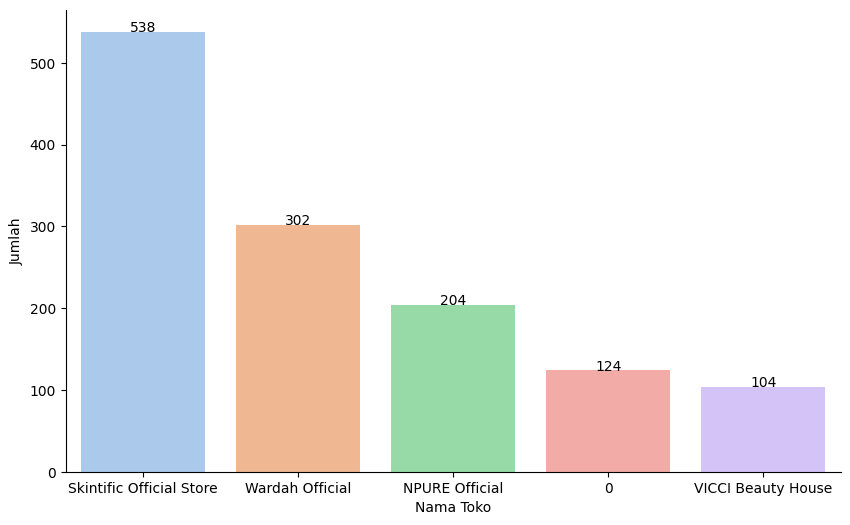

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Menghitung jumlah kemunculan setiap label di dalam kolom 'nama_toko'
data_nama_toko = data_visualisasi['nama-toko'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
data_nama_toko = data_nama_toko[:5]

# Membuat plot bar vertikal
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
plot = sns.barplot(x=data_nama_toko.index, y=data_nama_toko.values, palette='pastel')  # Menggunakan palet 'hsv'

# Mengatur label pada sumbu x
plt.xlabel('Nama Toko')

# Mengatur label pada sumbu y
plt.ylabel('Jumlah')

# Mengatur judul plot
# plt.title('Account Seller e-commerce Tokopedia Top 5')

# Menghilangkan garis tepi atas dan kanan pada plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan angka di setiap bar
for i in range(len(data_nama_toko)):
    plot.text(i, data_nama_toko.values[i], str(data_nama_toko.values[i]), ha='center')

# Menampilkan plot
plt.show()


## Data Terjual

In [ ]:
# Mengambil dua kolom 'product_sold' dan 'product_tok' dari data asli
data_terjual = data_visualisasi[['data-terjual', 'nama-toko']]
data_terjual

,data-terjual,nama-toko
0,500,SOMETHINC Official
1,250,SOMETHINC Official
2,1000,Henusa Official Shop
3,10000,Srikandi Ayu
4,10000,IndoStainless
...,...,...
3618,0,0
3619,0,0
3620,0,0
3621,0,0


In [ ]:
# Menghitung jumlah nilai null atau NaN setelah dihapus
data_terjual['data-terjual'].isnull().sum()

0

In [ ]:
# Menghilangkan baris dengan nilai null atau NaN di kolom 'nama_toko'
data_terjual.dropna(subset=['data-terjual'], inplace=True)

<ipython-input-41-950a30cbb1ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terjual.dropna(subset=['data-terjual'], inplace=True)


In [ ]:
# Mengonversi nilai dalam kolom 'sold' ke tipe data integer
data_terjual['data-terjual'].astype(int)
data_terjual

,data-terjual,nama-toko
0,500,SOMETHINC Official
1,250,SOMETHINC Official
2,1000,Henusa Official Shop
3,10000,Srikandi Ayu
4,10000,IndoStainless
...,...,...
3618,0,0
3619,0,0
3620,0,0
3621,0,0


In [ ]:
data_terjual.dtypes

data-terjual    object
nama-toko       object
dtype: object

In [ ]:
# Konversi kolom 'sold' ke tipe data numerik
data_terjual['data-terjual'] = pd.to_numeric(data_terjual['data-terjual'], errors='coerce')

<ipython-input-44-c85fbd3a64c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terjual['data-terjual'] = pd.to_numeric(data_terjual['data-terjual'], errors='coerce')


In [ ]:
# Lakukan filtering untuk memilih baris dengan nilai kolom 'sold' yang lebih besar atau sama dengan 1000
data_terjual_1000 = data_terjual[data_terjual['data-terjual'] >= 1000]
data_terjual_1000

,data-terjual,nama-toko
2,1000,Henusa Official Shop
3,10000,Srikandi Ayu
4,10000,IndoStainless
7,2000,NPURE Official
9,6000,COSRX Indonesia Official Shop
...,...,...
3506,7000,0
3507,10000,0
3508,6000,0
3509,9000,0


In [ ]:
# Menghitung jumlah kemunculan setiap nilai 'sold' yang lebih besar atau sama dengan 1000
data_terjual_counts_1000 = data_terjual_1000['data-terjual'].value_counts()
data_terjual_counts_1000

data-terjual
4000     308
10000    226
6000     213
2000     208
7000     205
5000     104
9000     100
1000      47
3000       7
8000       1
50000      1
Name: count, dtype: int64

In [ ]:
# Hitung jumlah baris data setelah dilakukan filtering
jumlah_data = len(data_terjual_1000)

# Tampilkan jumlah baris data
print("Jumlah baris data dengan penjualan >= 1000:", jumlah_data)

Jumlah baris data dengan penjualan >= 1000: 1420


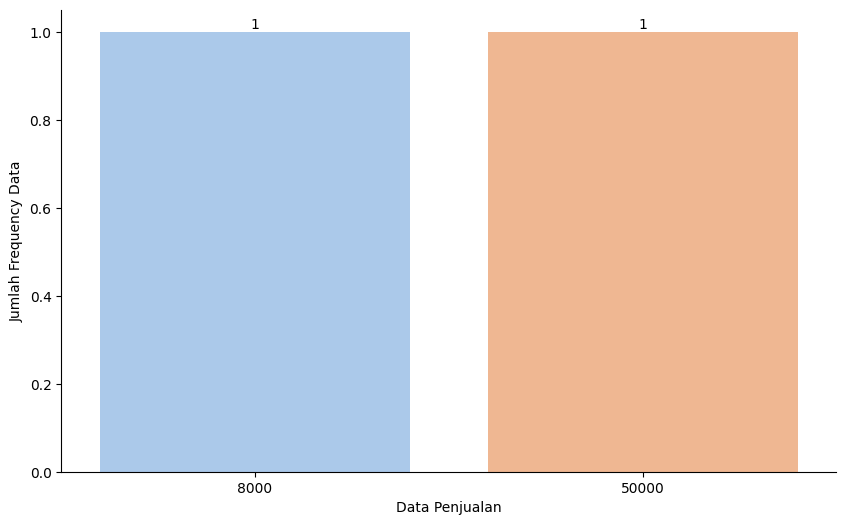

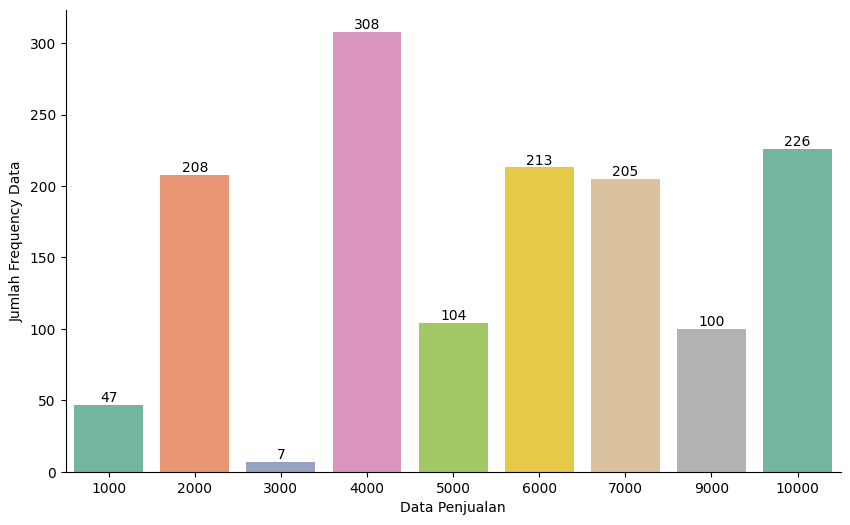

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah kemunculan setiap nilai 'sold' yang lebih besar atau sama dengan 1000
data_terjual_counts_1000 = data_terjual_1000['data-terjual'].value_counts()

# Memisahkan data dengan frekuensi 1 ke dalam dua bagian
data_terjual_counts_1 = {k: v for k, v in data_terjual_counts_1000.items() if v == 1}
data_terjual_counts_others = {k: v for k, v in data_terjual_counts_1000.items() if v > 1}

# Membuat plot untuk data dengan frekuensi 1
plt.figure(figsize=(10, 6))
# Mengurutkan data berdasarkan nilai X (data terjual)
sorted_data_terjual_counts_1 = dict(sorted(data_terjual_counts_1.items()))
plot_1 = sns.barplot(y=list(sorted_data_terjual_counts_1.values()), x=list(map(str, sorted_data_terjual_counts_1.keys())), palette='pastel')
plt.ylabel('Jumlah Frequency Data')
plt.xlabel('Data Penjualan')
# plt.title('Data Terjual dengan Frekuensi 1 di e-commerce Tokopedia')
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan angka pada setiap baris grafik
for i, value in enumerate(sorted_data_terjual_counts_1.values()):
    plot_1.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

# Membuat plot untuk data dengan frekuensi lebih dari 1
plt.figure(figsize=(10, 6))
# Mengurutkan data berdasarkan nilai X (data terjual)
sorted_data_terjual_counts_others = dict(sorted(data_terjual_counts_others.items()))
plot_others = sns.barplot(y=list(sorted_data_terjual_counts_others.values()), x=list(map(str, sorted_data_terjual_counts_others.keys())), palette='Set2')
plt.ylabel('Jumlah Frequency Data')
plt.xlabel('Data Penjualan')
# plt.title('Data Terjual dengan Frekuensi Lebih dari 1 di e-commerce Tokopedia')
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan angka pada setiap baris grafik
for i, (key, value) in enumerate(sorted_data_terjual_counts_others.items()):
    plot_others.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:
# Lakukan filtering untuk memilih baris dengan nilai kolom 'sold' yang lebih besar atau sama dengan 1000
data_terjual_999 = data_terjual[data_terjual['data-terjual'] < 1000]
data_terjual_999

,data-terjual,nama-toko
0,500,SOMETHINC Official
1,250,SOMETHINC Official
5,100,TWOCARE x Muscle Nutrition
6,80,NPURE Official
8,500,Guardian Official Store
...,...,...
3618,0,0
3619,0,0
3620,0,0
3621,0,0


In [ ]:
# Menghitung jumlah kemunculan setiap nilai 'sold' yang lebih besar atau sama dengan 1000
data_terjual_counts_999 = data_terjual_999['data-terjual'].value_counts()
data_terjual_counts_999

data-terjual
100    652
250    490
500    148
50     126
90     114
0      110
1       71
30      43
3       30
2       29
750     29
80      29
4       26
60      23
40      21
5       20
22      19
9       19
6       19
23      17
12      15
7       14
8       14
11      13
10      12
70      10
28      10
29      10
18       8
21       8
26       8
24       7
14       7
17       6
16       6
25       5
13       5
19       5
20       3
15       2
Name: count, dtype: int64

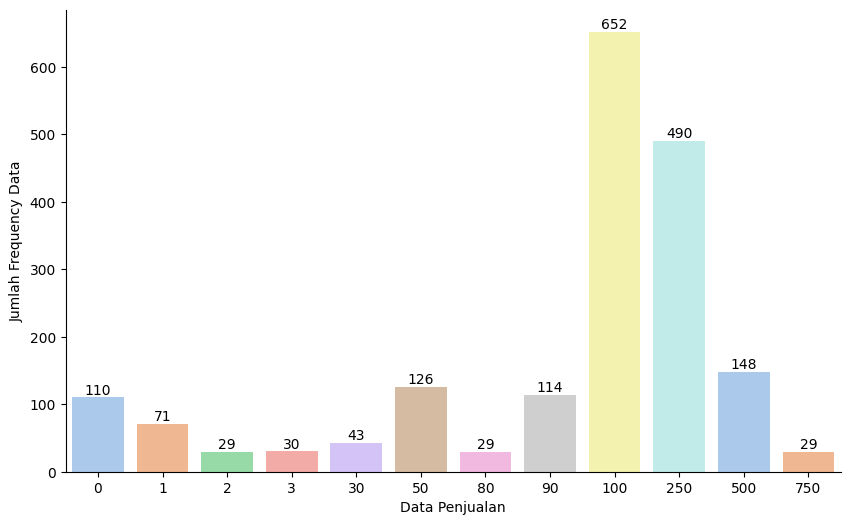

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah kemunculan setiap nilai 'sold' yang lebih besar atau sama dengan 1000
data_terjual_counts_999 = data_terjual_999['data-terjual'].value_counts()

# Memisahkan data dengan frekuensi lebih dari 1
data_terjual_counts_others = {k: v for k, v in data_terjual_counts_999.items() if v > 1}

# Mengurutkan data berdasarkan nilai 'x' dari kecil ke besar
sorted_data_terjual_counts_others = dict(sorted(data_terjual_counts_others.items(), key=lambda item: item[0]))

# Menambahkan filter untuk hanya menampilkan value dari x yang di atas 26
filtered_data_terjual_counts_others = {k: v for k, v in sorted_data_terjual_counts_others.items() if v > 26}

# Membuat plot untuk data dengan frekuensi lebih dari 1 dan nilai x di atas 26
plt.figure(figsize=(10, 6))
x_values = list(filtered_data_terjual_counts_others.keys())
y_values = list(filtered_data_terjual_counts_others.values())

# Mengubah plot garis menjadi plot batang
plot = sns.barplot(x=x_values, y=y_values, palette='pastel')  # Menggunakan palet pastel

plt.xlabel('Data Penjualan')
plt.ylabel('Jumlah Frequency Data')
# plt.title('Data Terjual dengan Frekuensi Lebih dari 1 di e-commerce Tokopedia')
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan angka pada setiap batang
for i, value in enumerate(y_values):
    plot.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


## Data Price

In [ ]:
# Menghitung jumlah kemunculan setiap nilai 'price' yang lebih besar atau sama dengan 100
data_price = data_visualisasi['price'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
data_price = data_price[data_price >= 100]

# Mengurutkan data berdasarkan nilai 'Price' dari kecil ke besar
data_price = data_price.sort_index(key=lambda x: x.astype(int))

# Menampilkan data yang telah diurutkan
print(data_price)


price
3500      100
15785     100
21650     100
22500     106
25900     100
29900     102
30800     101
32000     101
35000     102
35400     100
39000     103
47500     101
60000     105
79000     100
79500     100
90000     110
95000     103
109000    103
139000    108
187500    100
250000    113
339000    100
418000    100
449000    108
569000    101
Name: count, dtype: int64


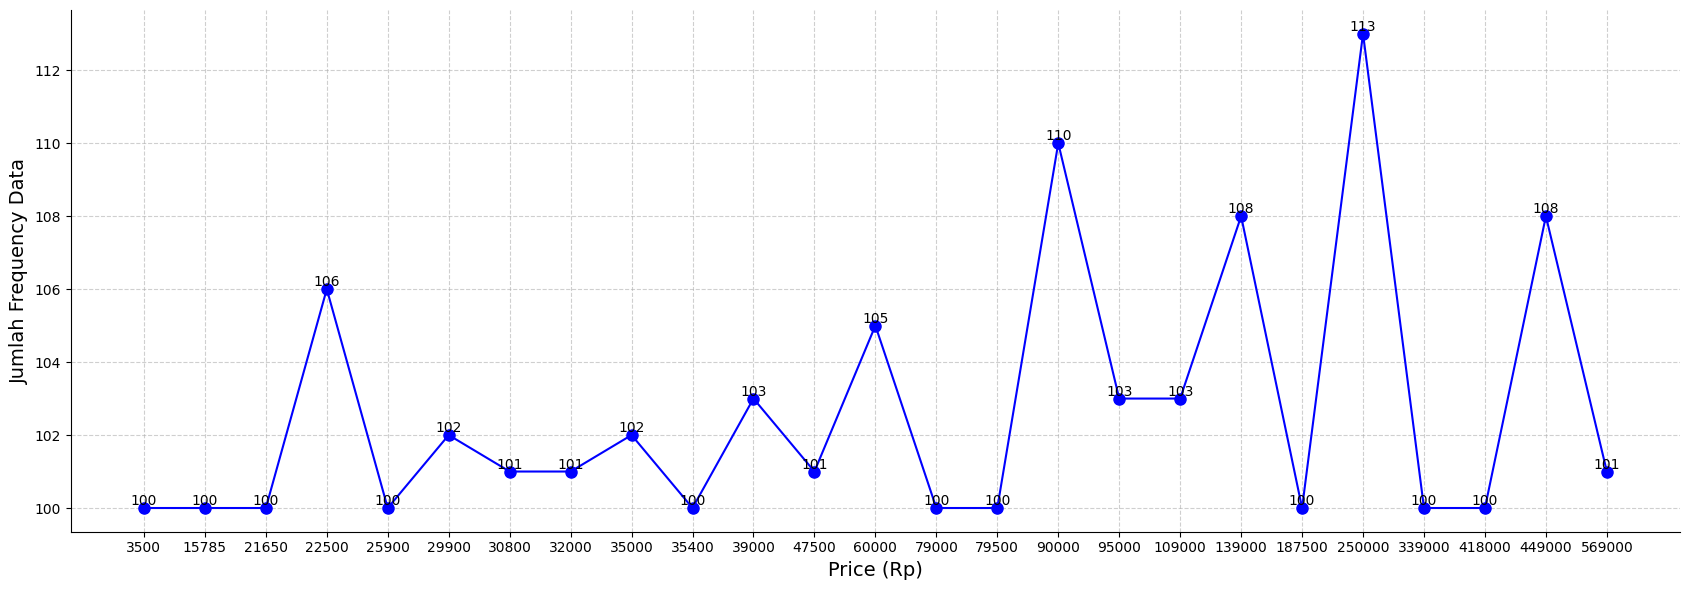

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah kemunculan setiap nilai 'price' yang lebih besar atau sama dengan 100
data_price = data_visualisasi['price'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
data_price = data_price[data_price >= 100]

# Mengubah Series menjadi DataFrame untuk memudahkan pengurutan
data_price = data_price.reset_index()
data_price.columns = ['Price', 'Frequency']

# Mengurutkan data berdasarkan nilai 'Price' dari kecil ke besar
sorted_data_price = data_price.sort_values(by='Price', ascending=True, key=lambda x: x.astype(int))

# Membuat plot untuk data yang telah diurutkan
plt.figure(figsize=(17, 6))  # Mengatur ukuran plot
x_values = sorted_data_price['Price']
y_values = sorted_data_price['Frequency']

# Membuat garis dengan titik
plt.plot(x_values, y_values, linestyle='-', marker='o', color='b', markersize=8)
plt.xlabel('Price (Rp)', fontsize=14)
plt.ylabel('Jumlah Frequency Data', fontsize=14)
# plt.title('Account Seller e-commerce Tokopedia dengan Promosi ≥100', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan angka pada setiap titik
for i, value in enumerate(y_values):
    plt.text(x_values.iloc[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Data Diskon

In [ ]:
# Menghitung jumlah kemunculan setiap nilai 'diskon' yang lebih besar atau sama dengan 100
data_diskon = data_visualisasi['diskon'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
data_diskon = data_diskon[data_diskon >= 0]

# Mengurutkan data berdasarkan nilai 'diskon' dari kecil ke besar
data_diskon = data_diskon.sort_index(key=lambda x: x.astype(int))

# Menampilkan data yang telah diurutkan
print(data_diskon)

diskon
0     3168
10      59
25      26
9       25
20      21
26      17
28      17
22      16
27      13
15      13
21      13
1       12
36      11
31      10
12      10
Name: count, dtype: int64

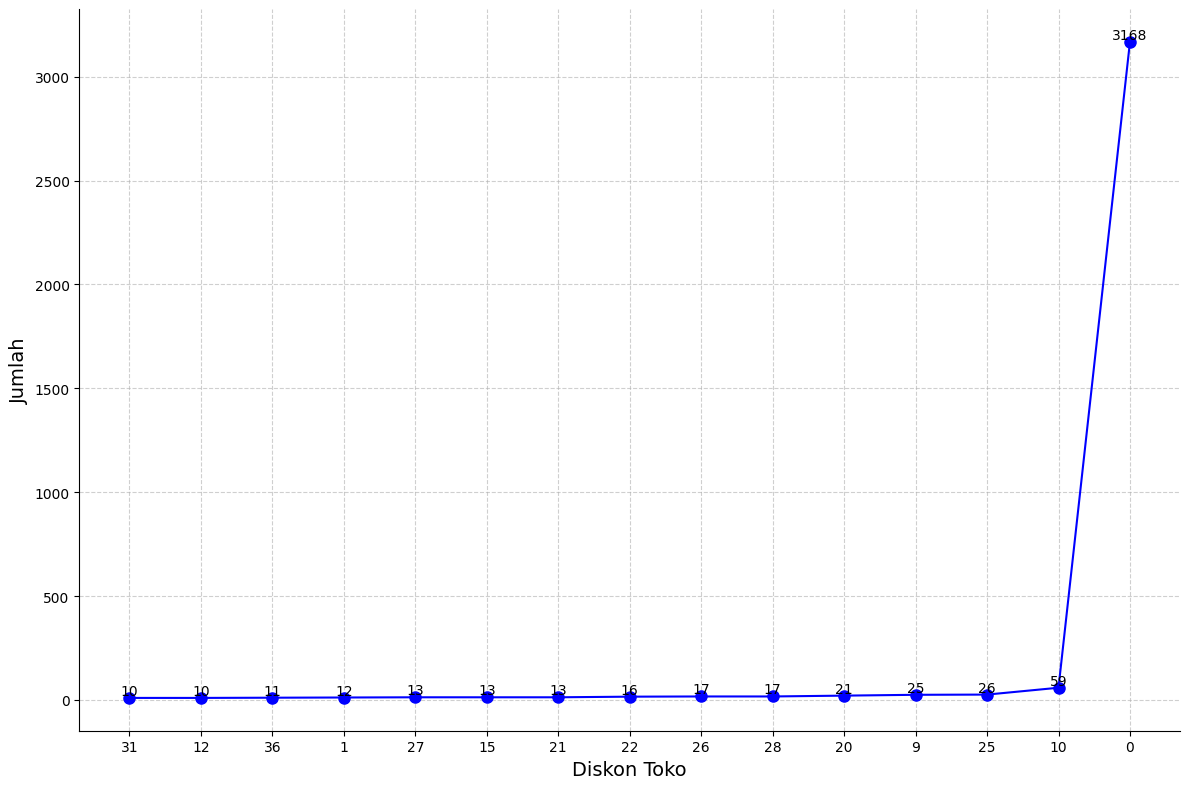

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah kemunculan setiap nilai 'diskon' yang lebih besar atau sama dengan 10
data_diskon = data_visualisasi['diskon'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 10
data_diskon = data_diskon[data_diskon >= 10]

# Mengurutkan data berdasarkan nilai dari yang terendah hingga tertinggi
sorted_data_diskon = data_diskon.sort_values()

# Membuat plot garis dengan titik
plt.figure(figsize=(12, 8))  # Mengatur ukuran plot
y_values = sorted_data_diskon.values
x_values = sorted_data_diskon.index

plt.plot(x_values, y_values, linestyle='-', marker='o', color='b', markersize=8)  # Membuat garis dengan titik
plt.ylabel('Jumlah', fontsize=14)
plt.xlabel('Diskon Toko', fontsize=14)
#plt.title('Account Seller e-commerce Tokopedia dengan Promosi ≥100', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan angka pada setiap titik
for i, value in enumerate(y_values):
    plt.text(x_values[i], value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Data CashBack

In [ ]:
# Mengambil dua kolom 'product_sold' dan 'product_tok' dari data asli
data_cashback = data_visualisasi[['cashback']]
data_cashback

,cashback
0,4900
1,8400
2,18000
3,19600
4,20000
...,...
3618,0
3619,0
3620,0
3621,0


In [ ]:
# Pastikan kolom 'cashback' ada dalam DataFrame 'data_visualisasi'
if 'cashback' in data_visualisasi.columns:
    # Mengambil kolom 'cashback' dari DataFrame 'data_visualisasi'
    data_cashback = data_visualisasi[['cashback']]
    # Menghapus baris yang memiliki nilai NaN dalam kolom 'cashback'
    data_cashback = data_cashback[data_cashback['cashback'].notna()]
    # Menampilkan data setelah penghapusan
    print(data_cashback)
else:
    print("Kolom 'cashback' tidak ditemukan dalam DataFrame 'data_visualisasi'.")


     cashback
0        4900
1        8400
2       18000
3       19600
4       20000
...       ...
3618        0
3619        0
3620        0
3621        0
3622        0

[3623 rows x 1 columns]


In [ ]:
import pandas as pd

data_cashback = data_cashback.replace('nan', pd.NA)
data_cashback.dropna(inplace=True)
print(data_cashback)

     cashback
0        4900
1        8400
2       18000
3       19600
4       20000
...       ...
3618        0
3619        0
3620        0
3621        0
3622        0

[3623 rows x 1 columns]


In [ ]:
# Menghitung jumlah kemunculan setiap nilai 'sold' yang lebih besar atau sama dengan 1000
data_cashback = data_cashback.value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
data_cashback = data_cashback[data_cashback >= 10]
data_cashback

cashback
0           1412
 3800        206
 20000       112
 1500        111
 1000        109
 26900       108
 1400        107
 2700        107
 1600        106
 4700        105
 8300        102
 25000       102
 34100       101
 11200       100
 20300       100
 10000        45
              16
 5900         12
 35000        12
 30400        11
 15900        11
 4900         11
 5000         11
 10200        11
 1200         10
 15000        10
 9700         10
 8000         10
Name: count, dtype: int64

In [ ]:
import re

# Mengganti nilai indeks kosong ('') menjadi angka 0 dengan regex
data_cashback.index = data_cashback.index.map(lambda x: re.sub(r'^\s*$', '0', str(x)))

# Menampilkan data setelah perubahan
print(data_cashback)


('0',)         1412
(' 3800',)      206
(' 20000',)     112
(' 1500',)      111
(' 1000',)      109
(' 26900',)     108
(' 1400',)      107
(' 2700',)      107
(' 1600',)      106
(' 4700',)      105
(' 8300',)      102
(' 25000',)     102
(' 34100',)     101
(' 11200',)     100
(' 20300',)     100
(' 10000',)      45
('',)            16
(' 5900',)       12
(' 35000',)      12
(' 30400',)      11
(' 15900',)      11
(' 4900',)       11
(' 5000',)       11
(' 10200',)      11
(' 1200',)       10
(' 15000',)      10
(' 9700',)       10
(' 8000',)       10
Name: count, dtype: int64


In [ ]:
# Mencari nilai indeks yang sama dengan '' dalam data_cashback
index_to_drop = [index for index in data_cashback.index if index[0] == '']

# Menghapus baris dengan indeks yang ditemukan
data_cashback.drop(index=index_to_drop)

# Menampilkan data setelah penghapusan
print(data_cashback)


('0',)         1412
(' 3800',)      206
(' 20000',)     112
(' 1500',)      111
(' 1000',)      109
(' 26900',)     108
(' 1400',)      107
(' 2700',)      107
(' 1600',)      106
(' 4700',)      105
(' 8300',)      102
(' 25000',)     102
(' 34100',)     101
(' 11200',)     100
(' 20300',)     100
(' 10000',)      45
('',)            16
(' 5900',)       12
(' 35000',)      12
(' 30400',)      11
(' 15900',)      11
(' 4900',)       11
(' 5000',)       11
(' 10200',)      11
(' 1200',)       10
(' 15000',)      10
(' 9700',)       10
(' 8000',)       10
Name: count, dtype: int64


Ini mas Aqil yang buatin

Data setelah penghapusan NaN:
     cashback
0        4900
1        8400
2       18000
3       19600
4       20000
...       ...
3618        0
3619        0
3620        0
3621        0
3622        0

[3623 rows x 1 columns]
Data setelah penghapusan indeks kosong:
cashback
0         1412
 3800      206
 20000     112
 1500      111
 1000      109
 26900     108
 1400      107
 2700      107
 1600      106
 4700      105
 8300      102
 25000     102
 34100     101
 11200     100
 20300     100
 10000      45
0           16
 5900       12
 35000      12
 30400      11
 5000       11
 10200      11
 15900      11
 4900       11
 8000       10
 9700       10
 1200       10
 15000      10
Name: count, dtype: int64


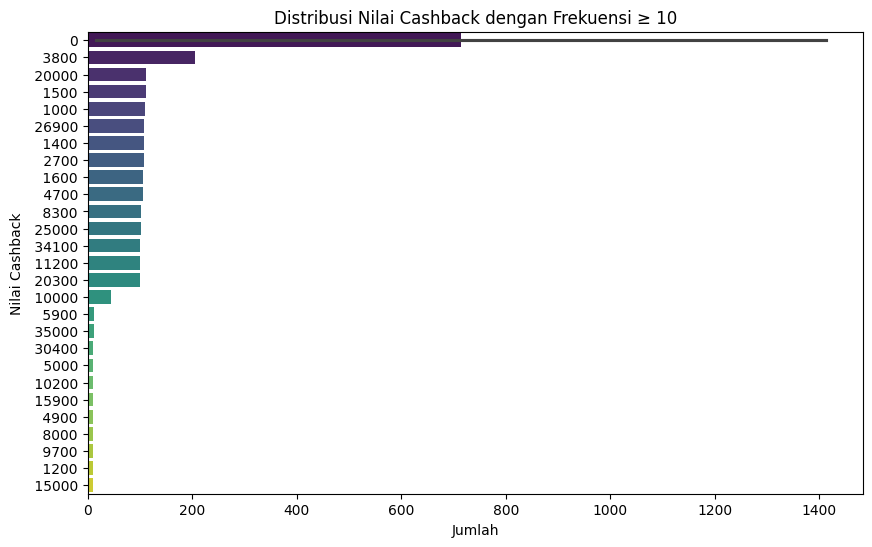

cashback
0         1412
 3800      206
 20000     112
 1500      111
 1000      109
 26900     108
 1400      107
 2700      107
 1600      106
 4700      105
 8300      102
 25000     102
 34100     101
 11200     100
 20300     100
 10000      45
0           16
 5900       12
 35000      12
 30400      11
 5000       11
 10200      11
 15900      11
 4900       11
 8000       10
 9700       10
 1200       10
 15000      10
Name: count, dtype: int64


In [ ]:
"""## Data CashBack"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom 'cashback' dari DataFrame 'data_visualisasi'
data_cashback = data_visualisasi[['cashback']]

# Pastikan kolom 'cashback' ada dalam DataFrame 'data_visualisasi'
if 'cashback' in data_visualisasi.columns:
    # Menghapus baris yang memiliki nilai NaN dalam kolom 'cashback'
    data_cashback = data_cashback[data_cashback['cashback'].notna()]
    print("Data setelah penghapusan NaN:")
    print(data_cashback)
else:
    print("Kolom 'cashback' tidak ditemukan dalam DataFrame 'data_visualisasi'.")

# Mengganti string 'nan' dengan nilai NA pandas
data_cashback = data_cashback.replace('nan', pd.NA)
data_cashback.dropna(inplace=True)

# Menghitung jumlah kemunculan setiap nilai 'cashback' yang lebih besar atau sama dengan 10
data_cashback = data_cashback['cashback'].value_counts()
data_cashback = data_cashback[data_cashback >= 10]

# Mengganti nilai indeks kosong ('') menjadi angka 0 dengan regex
import re
data_cashback.index = data_cashback.index.map(lambda x: re.sub(r'^\s*$', '0', str(x)))

# Menghapus baris dengan indeks yang ditemukan kosong
index_to_drop = [index for index in data_cashback.index if index == '']
data_cashback.drop(index=index_to_drop, inplace=True)

# Menampilkan data setelah penghapusan
print("Data setelah penghapusan indeks kosong:")
print(data_cashback)

# Membuat plot bar horizontal menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=data_cashback.values, y=data_cashback.index, palette='viridis')
plt.xlabel('Jumlah')
plt.ylabel('Nilai Cashback')
plt.title('Distribusi Nilai Cashback dengan Frekuensi ≥ 10')
plt.show()
print(data_cashback)


## Data Location

In [ ]:
# Menghitung jumlah kemunculan setiap label di dalam kolom 'sold'
location = data_visualisasi['location'].value_counts()
location

location
Dilayani Tokopedia    673
Jakarta Utara         594
Kab. Bekasi           538
Surabaya              478
Jakarta Barat         327
Jakarta Pusat         144
Tangerang Selatan     139
Jakarta Timur         137
0                     124
Tangerang              93
Jakarta Selatan        91
Bekasi                 30
Kab. Tangerang         28
Depok                  27
Bandung                25
Bogor                  16
Kab. Sleman            16
Semarang               14
Surakarta              13
Malang                 10
Kab. Jember             9
Kab. Bandung            9
Kab. Cirebon            8
Medan                   8
Kab. Tuban              6
Kab. Bogor              6
Kab. Purbalingga        6
Yogyakarta              6
Makassar                6
Kab. Kulon Progo        6
Kab. Sidoarjo           6
Kab. Brebes             5
Pekanbaru               4
Kab. Sukoharjo          4
Kab. Bantul             3
Kab. Sumedang           2
Cimahi                  2
Cirebon                 1
Kab

In [ ]:
# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
location = location[location >= 100]
location

location
Dilayani Tokopedia    673
Jakarta Utara         594
Kab. Bekasi           538
Surabaya              478
Jakarta Barat         327
Jakarta Pusat         144
Tangerang Selatan     139
Jakarta Timur         137
0                     124
Name: count, dtype: int64

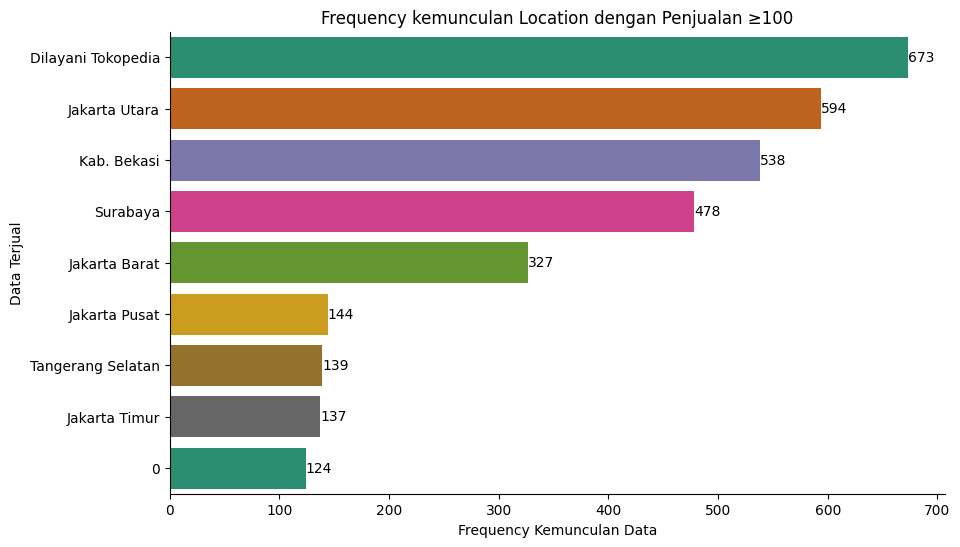

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah kemunculan setiap label di dalam kolom 'sold'
location = data_visualisasi['location'].value_counts()

# Memfilter hasil value_counts untuk hanya nilai yang lebih besar atau sama dengan 100
location = location[location >= 100]

# Membuat plot bar horizontal
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
plot = sns.barplot(x=location.values, y=location.index, palette='Dark2')

# Menambahkan label pada setiap bar
for i, value in enumerate(location.values):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=10)

# Mengatur label pada sumbu x
plt.xlabel('Frequency Kemunculan Data')

# Mengatur label pada sumbu y
plt.ylabel('Data Terjual')

# Mengatur judul plot
plt.title('Frequency kemunculan Location dengan Penjualan ≥100')

# Menghilangkan garis tepi atas dan kanan pada plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Menampilkan plot
plt.show()


## Data Rating

In [ ]:
 # Memeriksa tipe data kolom 'rating'
print(data_visualisasi['rating'].dtype)

# Memeriksa apakah ada nilai non-numerik di dalam kolom 'rating'
non_numeric_values = data_visualisasi[~data_visualisasi['rating'].apply(lambda x: isinstance(x, (int, float)))]['rating']
print(non_numeric_values)

object
0       4.9
1       4.9
2       4.9
3       4.9
4       5.0
       ... 
3618      0
3619      0
3620      0
3621      0
3622      0
Name: rating, Length: 3623, dtype: object


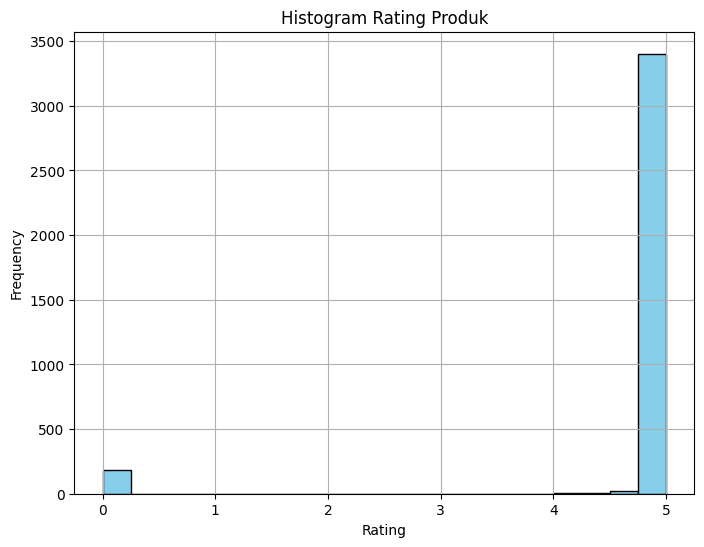

In [ ]:
from matplotlib import pyplot as plt

# Memastikan bahwa kolom 'rating' berisi data numerik
data_visualisasi['rating'] = pd.to_numeric(data_visualisasi['rating'], errors='coerce')

# Membersihkan data dari nilai null atau NaN
data_visualisasi = data_visualisasi.dropna(subset=['rating'])

# Membuat histogram
plt.figure(figsize=(8, 6))
plt.hist(data_visualisasi['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# <h1> Data X and Data New for K-Means </h1>

## <h2> Adding Coloumn : harga-diskon </h2>

In [ ]:
# Menghitung kolom baru 'harga_diskon'
data['harga-diskon'] = data['harga-awal'].astype(float) * ((data['diskon'].astype(float))/100)
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4.9,Tangerang,SOMETHINC Official,599999,73,4900,437999.27
1,250,109999,4.9,Tangerang,SOMETHINC Official,479999,77,8400,369599.23
2,1000,89999,4.9,Surabaya,Henusa Official Shop,399999,78,18000,311999.22
3,10000,99000,4.9,Bekasi,Srikandi Ayu,109000,9,19600,9810.00
4,10000,169000,5.0,Jakarta Barat,IndoStainless,186000,9,20000,16740.00
...,...,...,...,...,...,...,...,...,...
3618,0,250000,0,0,0,0,0,0,0.00
3619,0,3500,0,0,0,0,0,0,0.00
3620,0,60000,0,0,0,0,0,0,0.00
3621,0,35000,0,0,0,0,0,0,0.00


In [ ]:
# Menggunakan round() untuk membulatkan nilai dan mengatasi NaN
data['harga-diskon'] = data['harga-diskon'].apply(lambda x: round(x) if pd.notna(x) else x)

# Mengonversi nilai ke tipe data integer
data['harga-diskon'] = data['harga-diskon'].astype(object)

# Mengganti nilai NaN dengan 0 (opsional)
data['harga-diskon'] = data['harga-diskon'].fillna(0)

# Mengonversi nilai ke tipe data integer
data['harga-diskon'] = data['harga-diskon'].astype(int)

print(data['harga-diskon'].iloc[0])  # Output: 437999

437999


In [ ]:
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4.9,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4.9,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4.9,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4.9,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5.0,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
3618,0,250000,0,0,0,0,0,0,0
3619,0,3500,0,0,0,0,0,0,0
3620,0,60000,0,0,0,0,0,0,0
3621,0,35000,0,0,0,0,0,0,0


In [ ]:
data.dtypes

sold            object
price           object
rating          object
location        object
nama-toko       object
harga-awal      object
diskon          object
cashback        object
harga-diskon     int64
dtype: object

## <h2> Changes Data Type : all coloumn </h2>

In [ ]:
# Konversi nilai-nilai dalam kolom ke tipe data numerik
data['sold'] = pd.to_numeric(data['sold'])
data['price'] = pd.to_numeric(data['price'])
data['rating'] = pd.to_numeric(data['rating'])
data['harga-awal'] = pd.to_numeric(data['harga-awal'])
data['diskon'] = pd.to_numeric(data['diskon'])
data['harga-diskon'] = pd.to_numeric(data['harga-diskon'])

In [ ]:
# Ubah semua kolom menjadi tipe data integer
data['sold'] = data['sold'].fillna(0).astype(int)
data['price'] = data['price'].fillna(0).astype(int)
data['rating'] = data['rating'].fillna(0).astype(int)
data['harga-awal'] = data['harga-awal'].fillna(0).astype(int)
data['diskon'] = data['diskon'].fillna(0).astype(int)
data['harga-diskon'] = data['harga-diskon'].fillna(0).astype(int)

In [ ]:
# Konversi nilai-nilai dalam kolom 'cashback' ke tipe data numerik dengan menganggap nilai-nilai yang tidak valid sebagai NaN
data['cashback'] = pd.to_numeric(data['cashback'], errors='coerce')

# Mengganti nilai-nilai NaN dengan 0
data['cashback'] = data['cashback'].fillna(0)

# Ubah ke tipe data integer
data['cashback'] = data['cashback'].astype(int)

In [ ]:
data.dtypes

sold             int64
price            int64
rating           int64
location        object
nama-toko       object
harga-awal       int64
diskon           int64
cashback         int64
harga-diskon     int64
dtype: object

## <h2> Delete - Data Cleaned </h2>

In [ ]:
# Menghapus baris dengan nilai '0' pada kolom 'sold'
data = data.loc[data['diskon'] != 0]
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
450,2000,55000,4,Jakarta Utara,Slurp Indonesia Official,142000,10,25000,14200
451,4000,180000,5,Jakarta Barat,Achilles Collection,136750,10,26900,13675
452,250,15200,4,Surabaya,naenroo_store,1137000,26,34100,295620
453,90,75000,4,Tangerang Selatan,Toyoco,112110,15,8300,16816


In [ ]:
# Menghapus baris dengan nilai '0' pada kolom 'sold'
data_cleaned = data.loc[data['sold'] != 0]
data_cleaned

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
450,2000,55000,4,Jakarta Utara,Slurp Indonesia Official,142000,10,25000,14200
451,4000,180000,5,Jakarta Barat,Achilles Collection,136750,10,26900,13675
452,250,15200,4,Surabaya,naenroo_store,1137000,26,34100,295620
453,90,75000,4,Tangerang Selatan,Toyoco,112110,15,8300,16816


In [ ]:
# Menghapus baris dengan nilai '0' pada kolom 'sold'
data_cleaned = data.loc[data['location'] != 0]
data_cleaned

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
450,2000,55000,4,Jakarta Utara,Slurp Indonesia Official,142000,10,25000,14200
451,4000,180000,5,Jakarta Barat,Achilles Collection,136750,10,26900,13675
452,250,15200,4,Surabaya,naenroo_store,1137000,26,34100,295620
453,90,75000,4,Tangerang Selatan,Toyoco,112110,15,8300,16816


In [ ]:
# Menghapus baris dengan nilai '0' pada kolom 'sold'
data_cleaned = data.loc[data['harga-awal'] != 0]
data_cleaned

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
450,2000,55000,4,Jakarta Utara,Slurp Indonesia Official,142000,10,25000,14200
451,4000,180000,5,Jakarta Barat,Achilles Collection,136750,10,26900,13675
452,250,15200,4,Surabaya,naenroo_store,1137000,26,34100,295620
453,90,75000,4,Tangerang Selatan,Toyoco,112110,15,8300,16816


In [ ]:
# Menghapus baris dengan nilai '0' pada kolom 'sold'
data_cleaned = data.loc[data['cashback'] != '0']
data_cleaned

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
450,2000,55000,4,Jakarta Utara,Slurp Indonesia Official,142000,10,25000,14200
451,4000,180000,5,Jakarta Barat,Achilles Collection,136750,10,26900,13675
452,250,15200,4,Surabaya,naenroo_store,1137000,26,34100,295620
453,90,75000,4,Tangerang Selatan,Toyoco,112110,15,8300,16816


In [ ]:
# Menghapus baris dengan nilai '0' pada kolom 'sold'
data_cleaned = data.loc[data['harga-diskon'] != '0']
data_cleaned

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740
...,...,...,...,...,...,...,...,...,...
450,2000,55000,4,Jakarta Utara,Slurp Indonesia Official,142000,10,25000,14200
451,4000,180000,5,Jakarta Barat,Achilles Collection,136750,10,26900,13675
452,250,15200,4,Surabaya,naenroo_store,1137000,26,34100,295620
453,90,75000,4,Tangerang Selatan,Toyoco,112110,15,8300,16816


## <h2> Encoding Data Location </h2>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder_location = LabelEncoder()

# Mengkodekan kolom 'location'
data['location_encoded'] = label_encoder_location.fit_transform(data['location'])

# Menampilkan hasil
print(data[['location', 'location_encoded']])


              location  location_encoded
0            Tangerang                21
1            Tangerang                21
2             Surabaya                20
3               Bekasi                 1
4        Jakarta Barat                 7
..                 ...               ...
450      Jakarta Utara                11
451      Jakarta Barat                 7
452           Surabaya                20
453  Tangerang Selatan                22
454      Jakarta Barat                 7

[455 rows x 2 columns]


<ipython-input-82-d0855ae0b24a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location_encoded'] = label_encoder_location.fit_transform(data['location'])


## <h2> Encoding Data Nama Toko </h2>

In [ ]:
# Membuat objek LabelEncoder
label_encoder_toko = LabelEncoder()

# Mengkodekan kolom 'nama-toko'
data['toko_encoded'] = label_encoder_toko.fit_transform(data['nama-toko'])

# Menampilkan hasil
print(data[['nama-toko', 'toko_encoded']])

                    nama-toko  toko_encoded
0          SOMETHINC Official            63
1          SOMETHINC Official            63
2        Henusa Official Shop            32
3                Srikandi Ayu            73
4               IndoStainless            33
..                        ...           ...
450  Slurp Indonesia Official            72
451       Achilles Collection             2
452             naenroo_store            96
453                    Toyoco            79
454   CO PANDA OFFICIAL STORE            11

[455 rows x 2 columns]


<ipython-input-83-c4e953309e9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['toko_encoded'] = label_encoder_toko.fit_transform(data['nama-toko'])


## <h2> Hasil Encoding Data </h2>

In [ ]:
# Membuat DataFrame mapping
mapping_location = pd.DataFrame({'location': label_encoder_location.classes_, 'location_encoded': range(len(label_encoder_location.classes_))})
mapping_toko = pd.DataFrame({'nama_toko': label_encoder_toko.classes_, 'toko_encoded': range(len(label_encoder_toko.classes_))})

# Mengatur agar seluruh data ditampilkan tanpa terpotong
pd.set_option('display.max_rows', None)

In [ ]:
print("Mapping Location:")
print(mapping_location)

Mapping Location:
              location  location_encoded
0              Bandung                 0
1               Bekasi                 1
2                Bogor                 2
3               Cimahi                 3
4              Cirebon                 4
5                Depok                 5
6   Dilayani Tokopedia                 6
7        Jakarta Barat                 7
8        Jakarta Pusat                 8
9      Jakarta Selatan                 9
10       Jakarta Timur                10
11       Jakarta Utara                11
12         Kab. Bekasi                12
13          Kab. Bogor                13
14         Kab. Brebes                14
15        Kab. Cirebon                15
16         Kab. Jember                16
17    Kab. Purbalingga                17
18      Kab. Tangerang                18
19            Semarang                19
20            Surabaya                20
21           Tangerang                21
22   Tangerang Selatan                2

In [ ]:
print("\nMapping Nama Toko:")
print(mapping_toko)


Mapping Nama Toko:
                            nama_toko  toko_encoded
0              AVOSKIN BEAUTY JAKARTA             0
1                     AVOSTORE BEKASI             1
2                 Achilles Collection             2
3                        Ai Lu Beauty             3
4                         Aubree Skin             4
5      B Erl Cosmetics Store Cikarang             5
6                 BEAUTYHAUL OFFICIAL             6
7                      Beauty House77             7
8               Bioaqua official shop             8
9               Bromen Official Store             9
10                         CHICBEAUTE            10
11            CO PANDA OFFICIAL STORE            11
12      COSRX Indonesia Official Shop            12
13                 Cetaphil Indonesia            13
14       DAVIENA SKINCARE OFFICIAL ID            14
15                    DM ( Daun Mas )            15
16              DRW Skincare Jakarta!            16
17                    DrwskincareMall       

## <h2> Data X </h2>

In [ ]:
data

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon,location_encoded,toko_encoded
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999,21,63
1,250,109999,4,Tangerang,SOMETHINC Official,479999,77,8400,369599,21,63
2,1000,89999,4,Surabaya,Henusa Official Shop,399999,78,18000,311999,20,32
3,10000,99000,4,Bekasi,Srikandi Ayu,109000,9,19600,9810,1,73
4,10000,169000,5,Jakarta Barat,IndoStainless,186000,9,20000,16740,7,33
5,100,55000,5,Dilayani Tokopedia,TWOCARE x Muscle Nutrition,295000,5,9300,14750,6,76
6,80,180000,4,Jakarta Utara,NPURE Official,32500,31,11200,10075,11,50
7,2000,280000,4,Jakarta Utara,NPURE Official,130000,27,4700,35100,11,50
8,500,40698,5,Kab. Bekasi,Guardian Official Store,155000,25,3800,38750,12,30
9,6000,22500,4,Kab. Tangerang,COSRX Indonesia Official Shop,399999,78,20000,311999,18,12


In [ ]:
X=data.drop(columns=['location','nama-toko', 'rating'])
X

,sold,price,harga-awal,diskon,cashback,harga-diskon,location_encoded,toko_encoded
0,500,159999,599999,73,4900,437999,21,63
1,250,109999,479999,77,8400,369599,21,63
2,1000,89999,399999,78,18000,311999,20,32
3,10000,99000,109000,9,19600,9810,1,73
4,10000,169000,186000,9,20000,16740,7,33
5,100,55000,295000,5,9300,14750,6,76
6,80,180000,32500,31,11200,10075,11,50
7,2000,280000,130000,27,4700,35100,11,50
8,500,40698,155000,25,3800,38750,12,30
9,6000,22500,399999,78,20000,311999,18,12


In [ ]:
X.dtypes

sold                int64
price               int64
harga-awal          int64
diskon              int64
cashback            int64
harga-diskon        int64
location_encoded    int64
toko_encoded        int64
dtype: object

In [ ]:
data_new = X
data_new

,sold,price,harga-awal,diskon,cashback,harga-diskon,location_encoded,toko_encoded
0,500,159999,599999,73,4900,437999,21,63
1,250,109999,479999,77,8400,369599,21,63
2,1000,89999,399999,78,18000,311999,20,32
3,10000,99000,109000,9,19600,9810,1,73
4,10000,169000,186000,9,20000,16740,7,33
5,100,55000,295000,5,9300,14750,6,76
6,80,180000,32500,31,11200,10075,11,50
7,2000,280000,130000,27,4700,35100,11,50
8,500,40698,155000,25,3800,38750,12,30
9,6000,22500,399999,78,20000,311999,18,12


# <h1> Visualisasi ori Data </h1>

## <h2> Visualisasi - Sold </h2>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Ubah tipe data kolom 'sold' menjadi string
sold_data = data['sold'].astype(str)
sold_data

0        500
1        250
2       1000
3      10000
4      10000
5        100
6         80
7       2000
8        500
9       6000
10     10000
11      1000
12      7000
13      2000
14      4000
15       250
16        90
17      4000
18      6000
19     10000
20       500
21       100
22      4000
23       100
24       250
25       100
26      5000
27       250
28       250
29       100
30      7000
31      7000
32     10000
33      6000
34      9000
35       100
36      2000
37        50
38      1000
39       500
40       250
41     10000
42       500
43       100
44        60
45        80
46       500
47      6000
48     10000
49      1000
50      7000
51      2000
52      4000
53       250
54        90
55      4000
56      6000
57     10000
58       500
59       100
60      4000
61       100
62       250
63       100
64      5000
65       250
66       250
67       100
68      7000
69      7000
70     10000
71      6000
72      9000
73       100
74      2000
75        50
76        50

In [ ]:
# Konversi list menjadi Series
sold_series = pd.Series(sold_data)
sold_series

0        500
1        250
2       1000
3      10000
4      10000
5        100
6         80
7       2000
8        500
9       6000
10     10000
11      1000
12      7000
13      2000
14      4000
15       250
16        90
17      4000
18      6000
19     10000
20       500
21       100
22      4000
23       100
24       250
25       100
26      5000
27       250
28       250
29       100
30      7000
31      7000
32     10000
33      6000
34      9000
35       100
36      2000
37        50
38      1000
39       500
40       250
41     10000
42       500
43       100
44        60
45        80
46       500
47      6000
48     10000
49      1000
50      7000
51      2000
52      4000
53       250
54        90
55      4000
56      6000
57     10000
58       500
59       100
60      4000
61       100
62       250
63       100
64      5000
65       250
66       250
67       100
68      7000
69      7000
70     10000
71      6000
72      9000
73       100
74      2000
75        50
76        50

In [ ]:
# Menghitung jumlah kemunculan setiap nilai
sold_counts = sold_series.value_counts().sort_index()
sold_counts

sold
1         3
10        1
100      85
1000     11
10000    39
12        1
14        1
16        1
2000     27
21        1
22        3
23        3
24        1
250      67
26        1
28        1
29        1
3         1
30        2
3000      2
4         1
40        4
4000     41
5         1
50       14
500      24
5000     13
50000     1
6         3
60        2
6000     27
70        1
7000     28
750       6
8         1
80        5
8000      1
9         3
90       15
9000     12
Name: count, dtype: int64

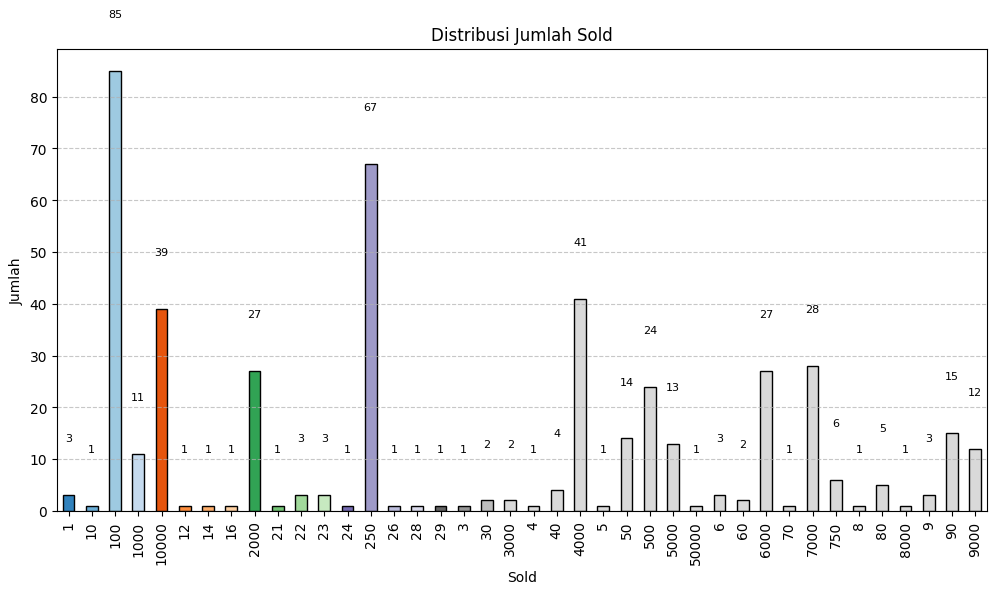

In [ ]:
import matplotlib.pyplot as plt

# Membuat palet warna
colors = plt.cm.tab20c(range(len(sold_counts)))

# Data visualisasi
sold_counts.plot(kind='bar', figsize=(12, 6), color=colors, edgecolor='black')

# Menambahkan label jumlah baris di atas tiap baris histogram
for i, count in enumerate(sold_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=8)

# Konfigurasi plot
plt.title('Distribusi Jumlah Sold')
plt.xlabel('Sold')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


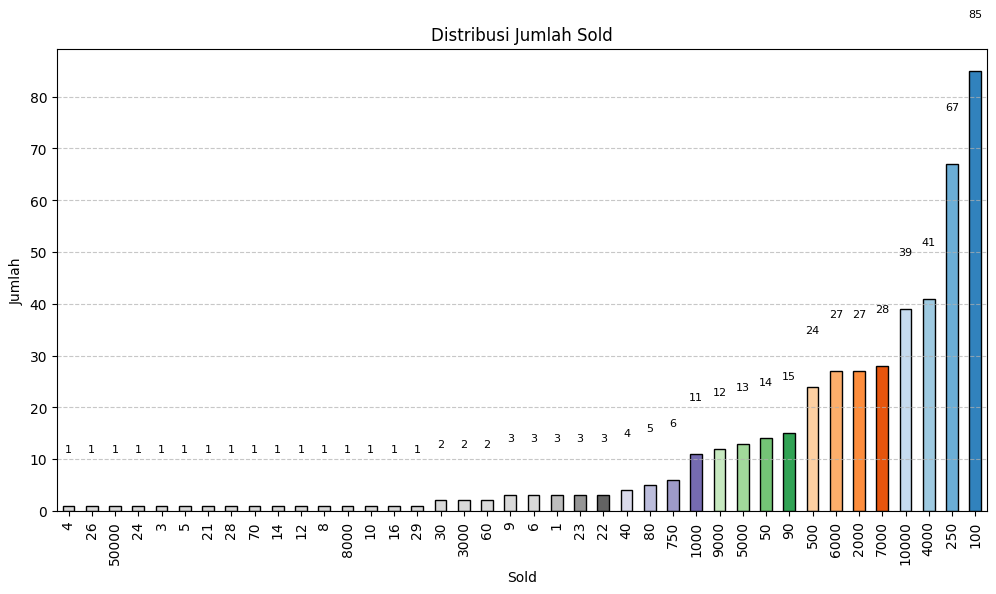

In [ ]:
import matplotlib.pyplot as plt

# Mengurutkan data dari terkecil ke terbesar
sold_counts_sorted = sold_counts.sort_values()

# Membuat palet warna yang dibalik
colors = plt.cm.tab20c(range(len(sold_counts_sorted)))[::-1]

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sold_counts_sorted.plot(kind='bar', color=colors, edgecolor='black')

# Menambahkan label jumlah baris di atas tiap baris histogram
for i, count in enumerate(sold_counts_sorted):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=8)

# Konfigurasi plot
plt.title('Distribusi Jumlah Sold')
plt.xlabel('Sold')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

## <h2> Visualisasi - Lokasi </h2>

In [ ]:
data.head(1)

,sold,price,rating,location,nama-toko,harga-awal,diskon,cashback,harga-diskon,location_encoded,toko_encoded
0,500,159999,4,Tangerang,SOMETHINC Official,599999,73,4900,437999,21,63


In [ ]:
X.head(1)

,sold,price,harga-awal,diskon,cashback,harga-diskon,location_encoded,toko_encoded
0,500,159999,599999,73,4900,437999,21,63


In [ ]:
# Hitung jumlah kemunculan setiap toko
count_per_toko = data['location'].value_counts()
count_per_toko

location
Dilayani Tokopedia    87
Kab. Bekasi           78
Jakarta Utara         77
Surabaya              64
Jakarta Barat         39
Jakarta Pusat         20
Tangerang             19
Jakarta Timur         18
Tangerang Selatan     17
Bekasi                 9
Kab. Tangerang         7
Jakarta Selatan        5
Bandung                4
Depok                  2
Semarang               1
Kab. Jember            1
Kab. Bogor             1
Bogor                  1
Kab. Brebes            1
Cimahi                 1
Cirebon                1
Kab. Cirebon           1
Kab. Purbalingga       1
Name: count, dtype: int64

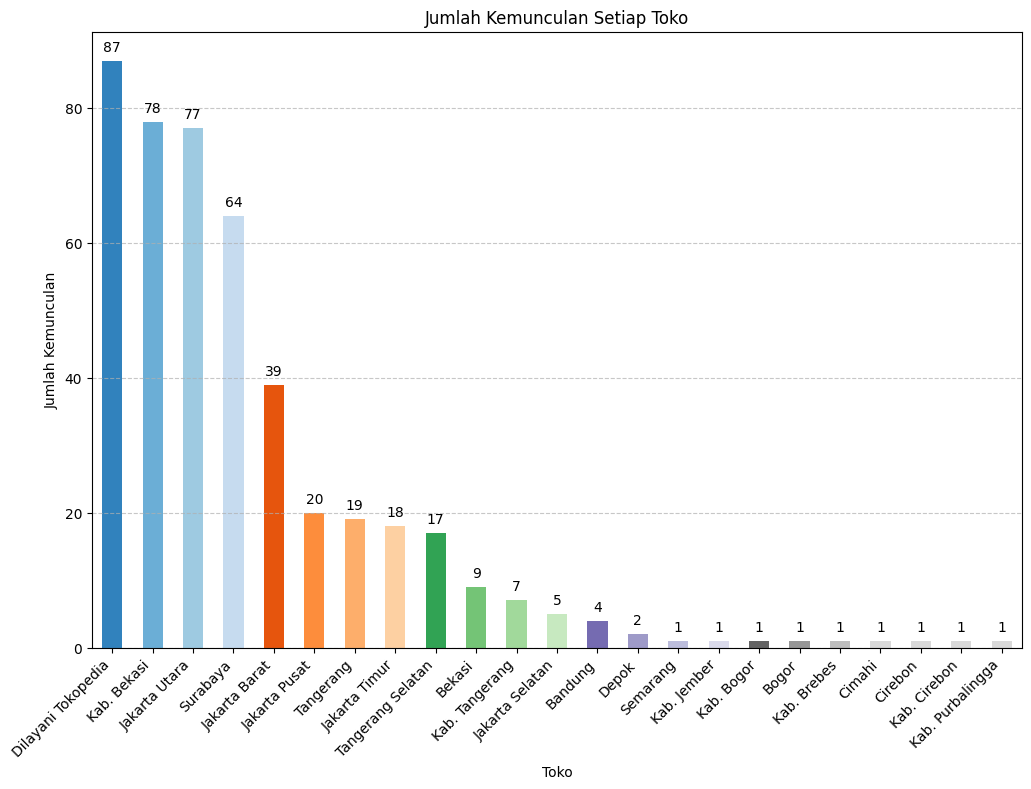

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
count_per_toko = data['location'].value_counts()

# Buat palet warna
colors = plt.cm.tab20c(np.arange(len(count_per_toko)))

# Plot
plt.figure(figsize=(12, 8))
count_per_toko.plot(kind='bar', color=colors)
plt.title('Jumlah Kemunculan Setiap Toko')
plt.xlabel('Toko')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka di atas tiap batang grafik
for i, count in enumerate(count_per_toko):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

## <h2> Visualisasi Diskon </h2>

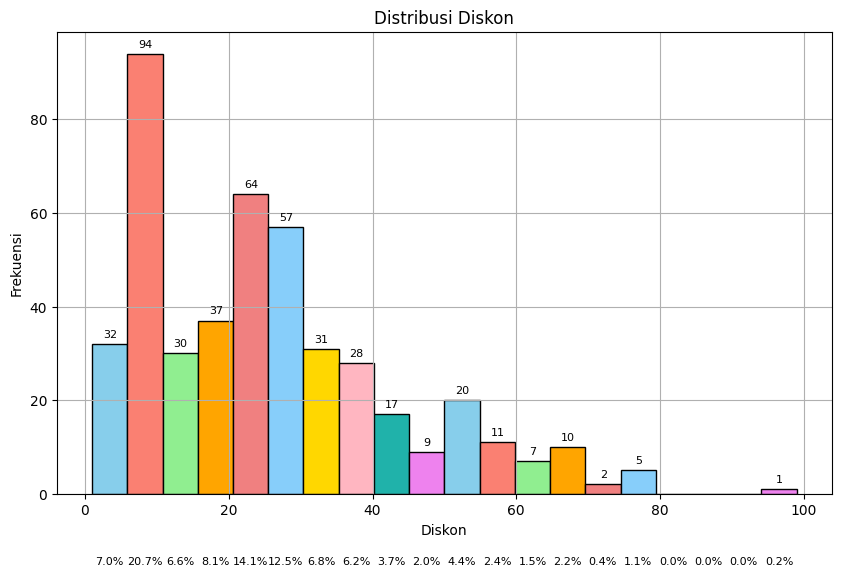

In [ ]:
import matplotlib.pyplot as plt

# Membuat histogram untuk data diskon
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(X['diskon'], bins=20, edgecolor='black')

# Membuat palet warna
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'gold', 'lightpink', 'lightseagreen', 'violet']

# Menambahkan label angka di atas tiap baris histogram
for i, count in enumerate(n):
    if count != 0:  # Hanya menambahkan label untuk batang yang memiliki frekuensi tidak nol
        plt.text(bins[i] + 2.5, count + 1, str(int(count)), ha='center', va='bottom', fontsize=8)

# Menambahkan persentase diskon di dasar grafik
total_data = len(X)
for i, bin_edge in enumerate(bins[:-1]):
    bin_width = bins[i + 1] - bin_edge
    bin_middle = bin_edge + bin_width / 2
    diskon_percentage = (n[i] / total_data) * 100
    plt.text(bin_middle, -15, f'{diskon_percentage:.1f}%', ha='center', fontsize=8)

# Memberi warna pada setiap batang histogram
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i % len(colors)])

plt.title('Distribusi Diskon')
plt.xlabel('Diskon')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


## <h2> Visualisasi Cashback </h2>

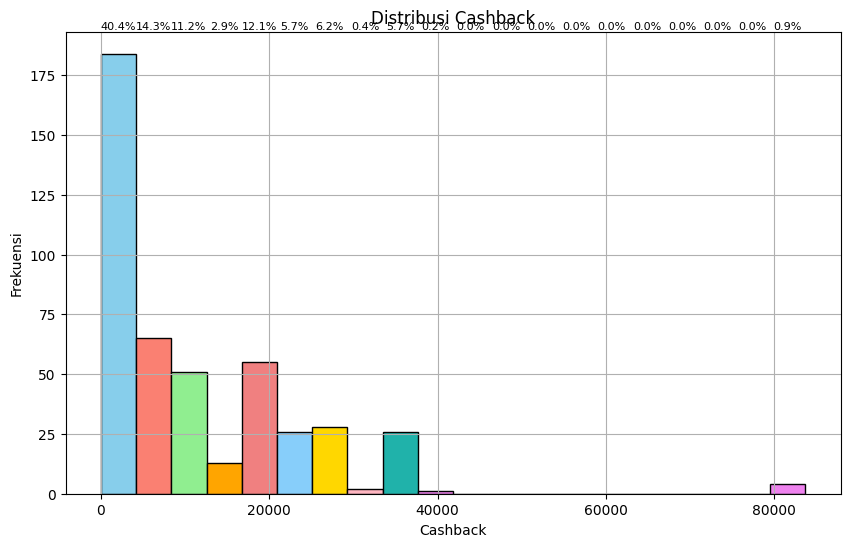

In [ ]:
import matplotlib.pyplot as plt

# Membuat histogram untuk data cashback
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(X['cashback'], bins=20, edgecolor='black')

# Menghitung total jumlah data
total_data = len(X)

# Menghitung frekuensi maksimum
max_freq = max(n)

# Membuat palet warna
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'gold', 'lightpink', 'lightseagreen', 'violet']

# Menambahkan persentase di atas tiap bin histogram
for i, bin_edge in enumerate(bins[:-1]):
    bin_width = bins[i + 1] - bin_edge
    bin_middle = bin_edge + bin_width / 2
    cashback_percentage = (n[i] / total_data) * 100
    plt.text(bin_middle, max_freq + 10, f'{cashback_percentage:.1f}%', ha='center', fontsize=8)

# Memberi warna pada setiap batang histogram
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i % len(colors)])

# Menambahkan label pada sumbu x dan y
plt.xlabel('Cashback')
plt.ylabel('Frekuensi')

plt.title('Distribusi Cashback')

plt.grid(True)
plt.show()


In [ ]:
# Ubah tipe data kolom 'sold' menjadi string
cashback_data = data['cashback'].astype(str)
cashback_data

0       4900
1       8400
2      18000
3      19600
4      20000
5       9300
6      11200
7       4700
8       3800
9      20000
10      2700
11      1000
12      3800
13     25000
14     26900
15     34100
16      8300
17     20300
18      1500
19      1600
20      1400
21      4900
22     35000
23     20000
24     18000
25     20000
26      9300
27     11200
28      4700
29      3800
30     20000
31      2700
32      1000
33      3800
34     25000
35     26900
36     34100
37      8300
38     20300
39      1500
40      1600
41      1400
42      7400
43     35000
44     15800
45     17400
46     15000
47      3900
48      6400
49      1600
50      6000
51     11200
52      4700
53      3800
54     20000
55      2700
56      1000
57      3800
58     25000
59     26900
60     34100
61      8300
62     20300
63      1500
64      1600
65      1400
66     15500
67      9700
68     14100
69     34100
70      4100
71     10000
72     11200
73      4700
74      3800
75     20000
76      2700

In [ ]:
# Konversi list menjadi Series
cashback_series = pd.Series(cashback_data)
cashback_series

0       4900
1       8400
2      18000
3      19600
4      20000
5       9300
6      11200
7       4700
8       3800
9      20000
10      2700
11      1000
12      3800
13     25000
14     26900
15     34100
16      8300
17     20300
18      1500
19      1600
20      1400
21      4900
22     35000
23     20000
24     18000
25     20000
26      9300
27     11200
28      4700
29      3800
30     20000
31      2700
32      1000
33      3800
34     25000
35     26900
36     34100
37      8300
38     20300
39      1500
40      1600
41      1400
42      7400
43     35000
44     15800
45     17400
46     15000
47      3900
48      6400
49      1600
50      6000
51     11200
52      4700
53      3800
54     20000
55      2700
56      1000
57      3800
58     25000
59     26900
60     34100
61      8300
62     20300
63      1500
64      1600
65      1400
66     15500
67      9700
68     14100
69     34100
70      4100
71     10000
72     11200
73      4700
74      3800
75     20000
76      2700

In [ ]:
# Menghitung jumlah kemunculan setiap nilai
cashback_counts = cashback_series.value_counts().sort_index()
cashback_counts = cashback_counts.sort_values(ascending=False)
cashback_counts

cashback
3800     44
20000    25
2700     24
1000     24
1400     23
26900    22
1600     22
34100    22
4700     22
11200    21
8300     21
25000    21
20300    21
1500     21
10000    13
4900      5
8400      4
18000     4
0         4
35000     3
9700      2
2800      2
3000      2
30400     2
6100      2
26500     2
13900     2
11000     2
24000     2
7200      2
15900     2
1300      2
14100     2
15000     2
8000      2
81500     2
1900      2
83700     2
10200     2
8500      2
1700      2
9300      2
4400      1
1200      1
4100      1
5000      1
6400      1
5300      1
5700      1
5900      1
6000      1
39400     1
6500      1
7400      1
7500      1
7600      1
10700     1
9200      1
4000      1
15800     1
3900      1
2200      1
15700     1
17400     1
17500     1
1800      1
15500     1
18900     1
19400     1
19600     1
2100      1
21100     1
21900     1
2300      1
12500     1
24900     1
13300     1
13100     1
27100     1
27500     1
27700     1
28900     1
3100   

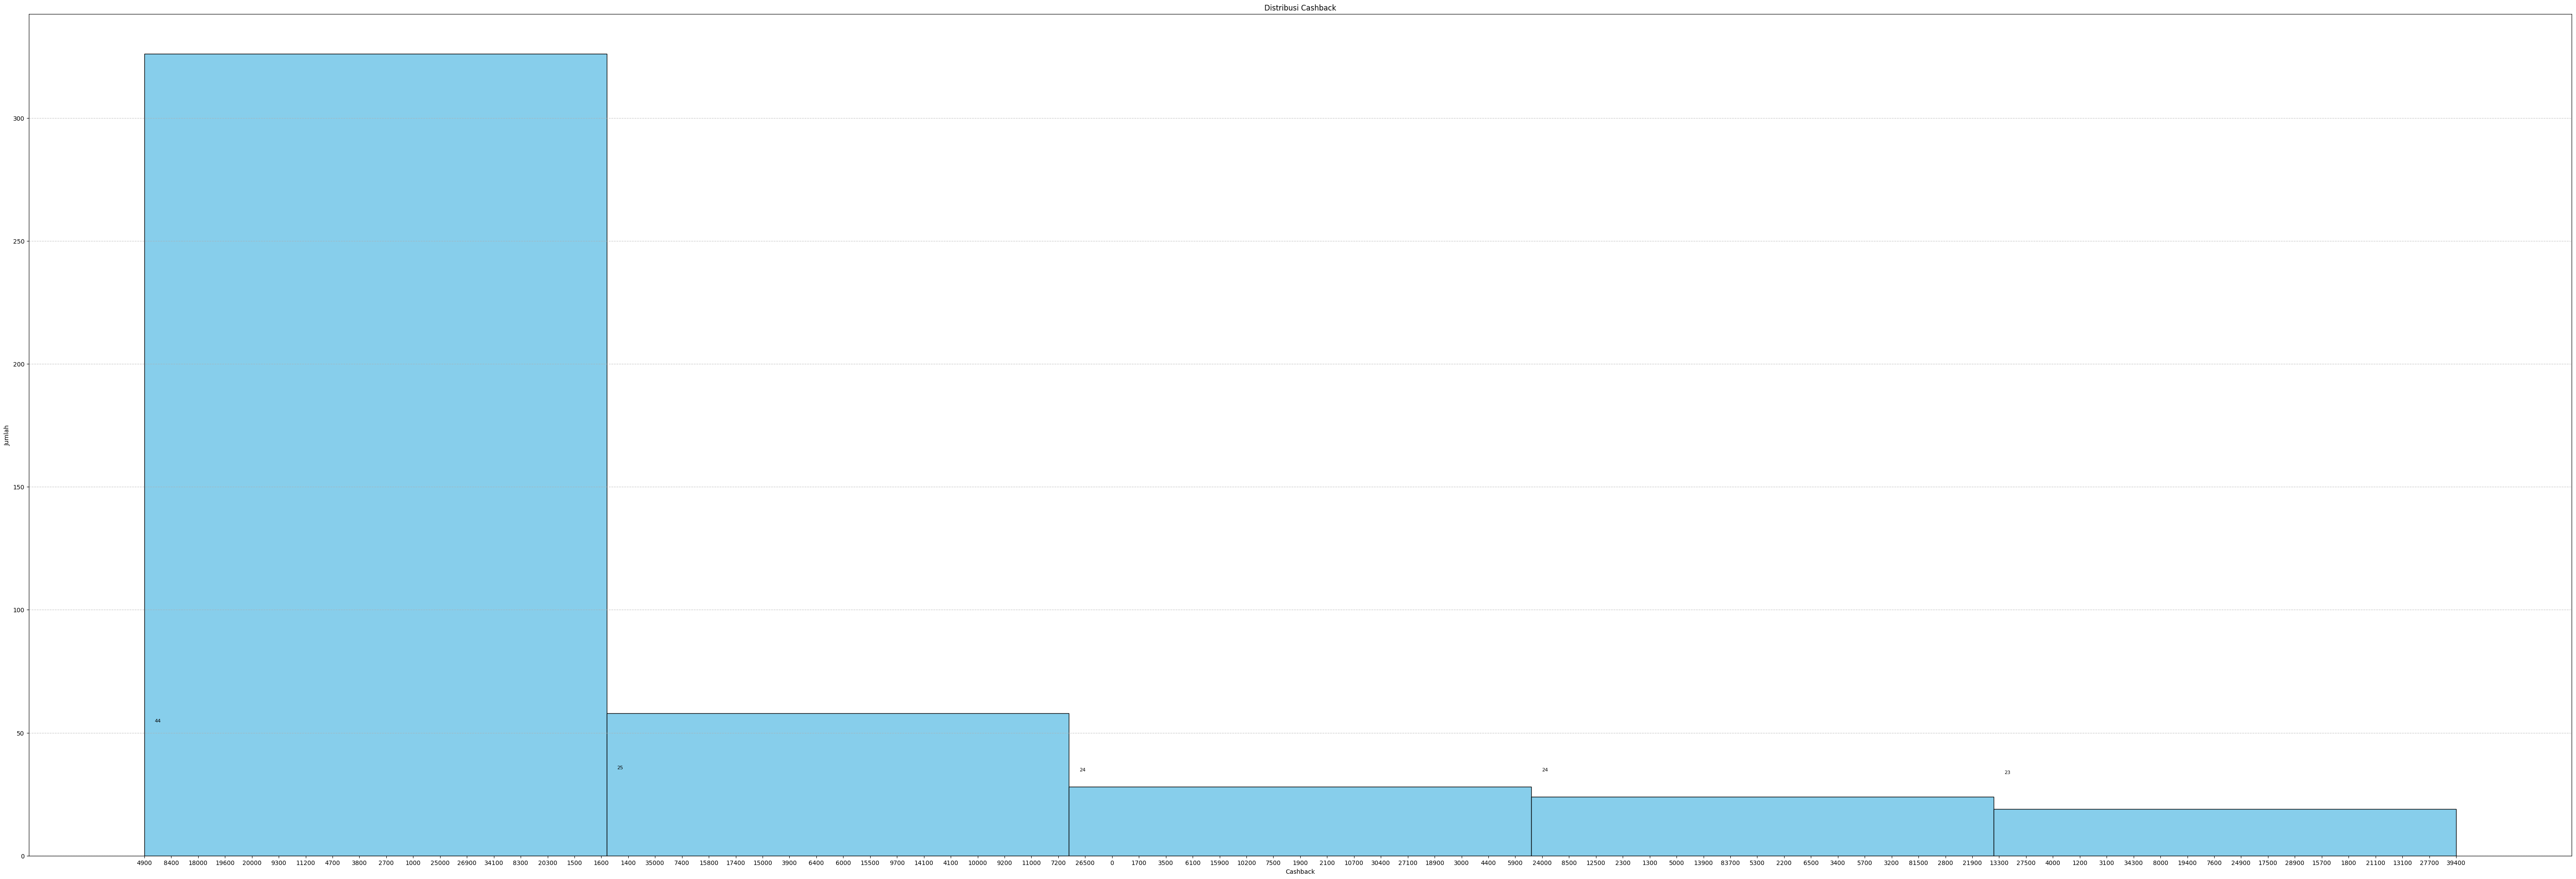

In [ ]:
import matplotlib.pyplot as plt

# Membuat histogram untuk data cashback
plt.figure(figsize=(75, 25))
n, bins, patches = plt.hist(cashback_series, bins=5, color='skyblue', edgecolor='black')

# Menambahkan label jumlah baris di atas tiap baris histogram
for count, bin_val, patch in zip(cashback_counts, bins, patches):
    if count != 0:
        plt.text(bin_val + 0.5, count + 10, str(count), ha='center', va='bottom', fontsize=8)

# Konfigurasi plot
plt.title('Distribusi Cashback')
plt.xlabel('Cashback')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


# <h1> K-Means </h1>

## <h2> Elbows Methods </h2>

In [ ]:
X.head(3)

,sold,price,harga-awal,diskon,cashback,harga-diskon,location_encoded,toko_encoded
0,500,159999,599999,73,4900,437999,21,63
1,250,109999,479999,77,8400,369599,21,63
2,1000,89999,399999,78,18000,311999,20,32


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
# Standardisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.56104306,  0.0751828 ,  0.86621257, ...,  2.17349524,
         1.68603039,  0.21753155],
       [-0.62291323, -0.1859774 ,  0.50622041, ...,  1.73366598,
         1.68603039,  0.21753155],
       [-0.43730272, -0.29044148,  0.26622564, ...,  1.36328345,
         1.50725066, -0.96031201],
       ...,
       [-0.62291323, -0.68113192,  2.47718049, ...,  1.25796234,
         1.50725066,  1.47136502],
       [-0.66251014, -0.36878432, -0.59742256, ..., -0.53481772,
         1.86481012,  0.82545081],
       [ 0.30513933, -0.29304786, -0.52875405, ..., -0.63426801,
        -0.81688585, -1.75820604]])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dalam data dengan mean dari masing-masing kolom
X_imputed = imputer.fit_transform(X)
X_imputed

array([[-0.56104306,  0.0751828 ,  0.86621257, ...,  2.17349524,
         1.68603039,  0.21753155],
       [-0.62291323, -0.1859774 ,  0.50622041, ...,  1.73366598,
         1.68603039,  0.21753155],
       [-0.43730272, -0.29044148,  0.26622564, ...,  1.36328345,
         1.50725066, -0.96031201],
       ...,
       [-0.62291323, -0.68113192,  2.47718049, ...,  1.25796234,
         1.50725066,  1.47136502],
       [-0.66251014, -0.36878432, -0.59742256, ..., -0.53481772,
         1.86481012,  0.82545081],
       [ 0.30513933, -0.29304786, -0.52875405, ..., -0.63426801,
        -0.81688585, -1.75820604]])

In [ ]:
import numpy as np

# Deteksi nilai yang hilang dalam array NumPy
missing_values = np.isnan(X_imputed)

# Filter array asli untuk menghapus baris yang mengandung nilai yang hilang
X = X[~missing_values.any(axis=1)]

In [ ]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Plot garis data')

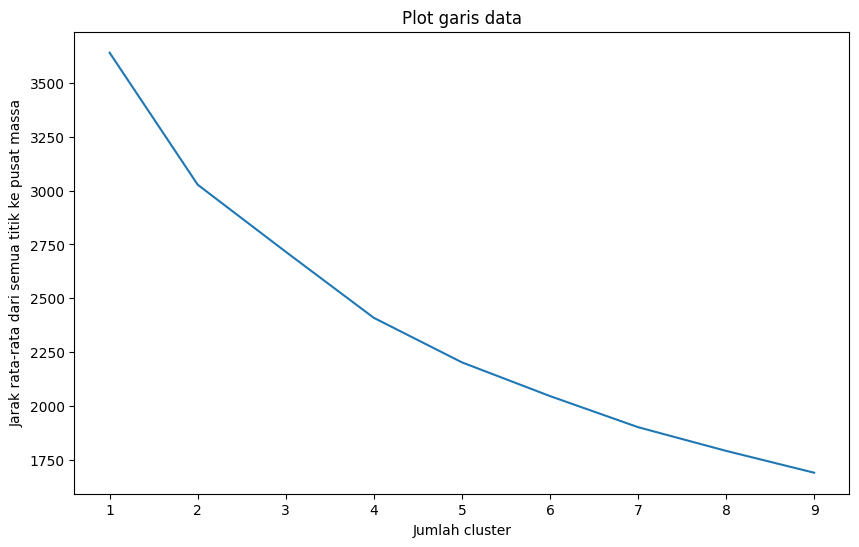

In [ ]:
msd=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(X)
    msd.append(kmean.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),msd)
plt.xlabel("Jumlah cluster")
plt.ylabel("Jarak rata-rata dari semua titik ke pusat massa")
plt.title('Plot garis data')

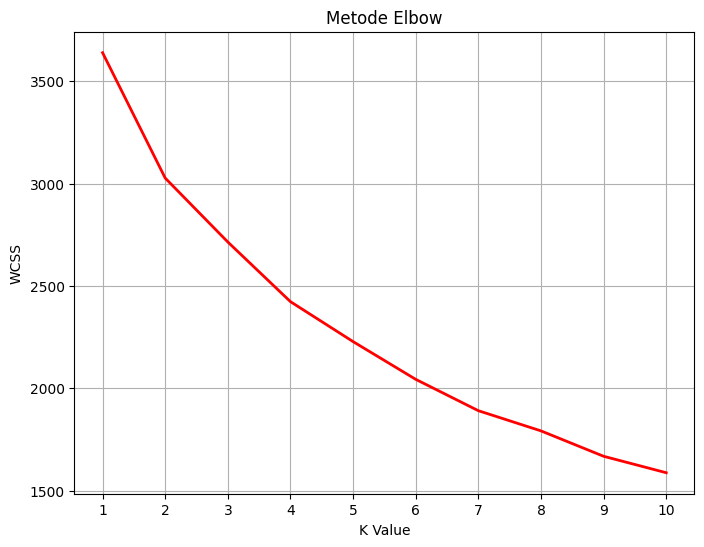

In [ ]:
#hitung Within Cluster Sum Of Squares (WCSS)
#WCSS mengukur total jarak antara pusat cluster dan data tujuannya memaksimalkan jumlah kluster
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red")
plt.title('Metode Elbow')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
X

array([[-0.56104306,  0.0751828 ,  0.86621257, ...,  2.17349524,
         1.68603039,  0.21753155],
       [-0.62291323, -0.1859774 ,  0.50622041, ...,  1.73366598,
         1.68603039,  0.21753155],
       [-0.43730272, -0.29044148,  0.26622564, ...,  1.36328345,
         1.50725066, -0.96031201],
       ...,
       [-0.62291323, -0.68113192,  2.47718049, ...,  1.25796234,
         1.50725066,  1.47136502],
       [-0.66251014, -0.36878432, -0.59742256, ..., -0.53481772,
         1.86481012,  0.82545081],
       [ 0.30513933, -0.29304786, -0.52875405, ..., -0.63426801,
        -0.81688585, -1.75820604]])

## <h2> K-Models </h2>

In [ ]:
# Inisialisasi model KMeans for cluster=6
k_model = KMeans(n_clusters=2, init='k-means++', random_state=42)

# Melatih model pada data X
k_model.fit(X)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Mendapatkan pusat cluster
cluster_centers = k_model.cluster_centers_
cluster_centers

array([[-0.06576321, -0.18119278,  0.99339844,  1.16554161,  0.008954  ,
         1.11992591, -0.15012538, -0.12691451],
       [ 0.02409343,  0.06638294, -0.36394778, -0.42701524, -0.00328045,
        -0.41030319,  0.05500089,  0.04649721]])

## <h2> Nilai Intertia </h2>

In [ ]:
k_model.inertia_

3027.31588418051

## <h2> Nilai Shilhoutte </h2>

In [ ]:
from sklearn.metrics import silhouette_score

# X adalah dataset yang telah dikelompokkan menggunakan algoritma clustering (misalnya KMeans)
# labels adalah label dari setiap data dalam X setelah clustering
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

NameError: name 'labels' is not defined

## <h2> Cluster - k = 2 </h2>

In [ ]:
k_model.predict(X)

In [ ]:
# Mendapatkan label cluster untuk setiap titik data
labels = k_model.labels_
labels

In [ ]:
data['labels'] = labels
data.head(10)

## <h2> Data New </h2>

In [ ]:
data_new

## <h2> Segmentasi Visual </h2>

In [ ]:
from sklearn.decomposition import PCA

# Membuat objek PCA
pca = PCA()

# Melakukan reduksi dimensi
X = pca.fit_transform(X)
X

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=data.labels, cmap='rainbow')
plt.colorbar()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sebaran plot data')
plt.show()


In [ ]:
data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pemisahan kolom target dan fitur
x = data.drop('labels', axis=1)  # Fitur
y = data['labels']  # Target

# Identifikasi fitur-fitur dengan tipe data non-numerik
non_numeric_features = x.select_dtypes(exclude=['int', 'float']).columns

# Hapus fitur-fitur non-numerik dari dataset x
x_numeric = x.drop(columns=non_numeric_features)

# Hitung matriks korelasi
correlation_matrix = x_numeric.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriks Korelasi antar Fitur')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.show()

# Tampilkan nilai koefisien korelasi
print("Korelasi antara fitur dan label kluster:")
print(correlation_matrix)

In [ ]:
x

In [ ]:
x

In [ ]:
y

# <h1> all Data Ending </h1>

In [ ]:
X

In [ ]:
# Install openpyxl jika belum terinstal
!pip install openpyxl

In [ ]:
data

In [ ]:
import pandas as pd
pd.options.display.max_rows = None

data

In [ ]:
data.dtypes

In [ ]:
import pandas as pd

# Specify the file path where you want to save the Excel file
file_path = "/content/drive/MyDrive/Data - Universitas Teknologi Yogyakarta /Data Science - Semester 8/data_preprocessed.xlsx"

# Save the DataFrame to Excel without the index
data.to_excel(file_path, index=False)

In [ ]:
import pandas as pd

# Specify the file path where you want to save the Excel file
file_path = "/content/drive/MyDrive/Data - Universitas Teknologi Yogyakarta /Data Science - Semester 8/data_new.xlsx"

# Save the DataFrame to Excel without the index
data_new.to_excel(file_path, index=False)

In [ ]:
data_new.head(3)

In [ ]:
data_new['labels'] = labels
data_new.head(40)

In [ ]:
data_new.dtypes

In [ ]:
# Simpan DataFrame ke dalam file Excel di Google Drive
data_new.to_excel("/content/drive/MyDrive/BAB 3/data_new_preprocessed.xlsx", index=False)

In [ ]:
# Menyimpan hasil mapping ke file Excel terpisah
mapping_location.to_excel('/content/drive/MyDrive/Data - Universitas Teknologi Yogyakarta /Data Science - Semester 8/mapping_location.xlsx', index=False)

In [ ]:

mapping_toko.to_excel('/content/drive/MyDrive/Data - Universitas Teknologi Yogyakarta /Data Science - Semester 8/mapping_toko.xlsx', index=False)

# See Cluster Data from Label

In [ ]:
 # Memfilter data berdasarkan label klaster 0
cluster_0 = data[data['labels'] == 0]

# Menampilkan data dengan label klaster 0
cluster_0

In [ ]:
 # Memfilter data berdasarkan label klaster 1
cluster_1 = data[data['labels'] == 1]

# Menampilkan data dengan label klaster 1
cluster_1

In [ ]:
 # Memfilter data berdasarkan label klaster 2
cluster_2 = data[data['labels'] == 2]

# Menampilkan data dengan label klaster 2
cluster_2

In [ ]:
 # Memfilter data berdasarkan label klaster 3
cluster_3 = data[data['labels'] == 3]

# Menampilkan data dengan label klaster 3
cluster_3

In [ ]:
 # Memfilter data berdasarkan label klaster 4
cluster_4 = data[data['labels'] == 4]

# Menampilkan data dengan label klaster 4
cluster_4

In [ ]:
 # Memfilter data berdasarkan label klaster 5
cluster_5 = data[data['labels'] == 5]

# Menampilkan data dengan label klaster 5
cluster_5

In [ ]:
 # Memfilter data berdasarkan label klaster 5
cluster_6 = data[data['labels'] == 6]

# Menampilkan data dengan label klaster 5
cluster_6

In [ ]:
 # Memfilter data berdasarkan label klaster 5
cluster_7 = data[data['labels'] == 7]

# Menampilkan data dengan label klaster 5
cluster_7

In [ ]:
 # Memfilter data berdasarkan label klaster 5
cluster_8 = data[data['labels'] == 8]

# Menampilkan data dengan label klaster 5
cluster_8

# DATA Visual

In [ ]:
cluster_centers

In [ ]:
# Menampilkan satu baris data tertentu
print(data.iloc[149])  # Menggunakan indeks 138 karena indeks dimulai dari 0

In [ ]:
# Menampilkan satu baris data tertentu
print(data.iloc[410])  # Menggunakan indeks 138 karena indeks dimulai dari 0

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=data.labels)
plt.colorbar()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sebaran plot data')

In [ ]:
# Visualisasi hasil clusters
plt.scatter(data["diskon"][data['labels'] == 0], data["cashback"][data['labels'] == 0], c='lightblue')
plt.scatter(data["diskon"][data['labels'] == 1], data["cashback"][data['labels'] == 1], c='pink')
plt.scatter(data["diskon"][data['labels'] == 2], data["cashback"][data['labels'] == 2], c='lightgreen')
plt.scatter(data["diskon"][data['labels'] == 3], data["cashback"][data['labels'] == 3], c='grey')
plt.scatter(data["diskon"][data['labels'] == 4], data["cashback"][data['labels'] == 4], c='magenta')
plt.scatter(data["diskon"][data['labels'] == 5], data["cashback"][data['labels'] == 5], c='yellow')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'gray', label = 'Centroids')
plt.title('Clusters Promosi')
plt.xlabel('Diskon')
plt.ylabel('Cashback')
plt.legend()
plt.show()


In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
data_new['labels'] =  labels
trace1 = go.Scatter3d(
    x= data_new['sold'],
    y= data_new['diskon'],
    z= data_new['cashback'],
    mode='markers',
     marker=dict(
        color = data_new['labels'],
        size= 20,
        line=dict(
            color= data_new['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Sold'),
            yaxis = dict(title  = 'Diskon'),
            zaxis = dict(title  = 'Cashback')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membuat scatter plot 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(data_new['sold'], data_new['diskon'], data_new['cashback'], c=data_new['labels'], cmap='viridis', s=50)

# Menambahkan label sumbu
ax.set_xlabel('Sold')
ax.set_ylabel('Diskon')
ax.set_zlabel('Cashback')

# Menambahkan colorbar
plt.colorbar(scatter)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.title('Clusters')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membuat scatter plot 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Memplot titik data dengan label sebagai warna
scatter = ax.scatter(data_new['diskon'], data_new['cashback'], data_new['labels'], c=data_new['labels'], cmap='viridis', s=50)

# Menambahkan label sumbu
ax.set_xlabel('Diskon')
ax.set_ylabel('Cashback')
ax.set_zlabel('Label')

# Menambahkan colorbar
plt.colorbar(scatter)

# Menampilkan plot
plt.title('Scatter Plot 3D: Diskon vs Cashback vs Label')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot 2D
plt.figure(figsize=(10, 6))

# Memplot titik data dengan x = diskon, y = cashback, dan warna sesuai dengan kolom labels
plt.scatter(data_new['diskon'], data_new['cashback'], c=data_new['labels'], cmap='viridis', s=50)

# Menambahkan label sumbu
plt.xlabel('Diskon')
plt.ylabel('Cashback')

# Menambahkan colorbar
plt.colorbar(label='Label')

# Menampilkan plot
plt.title('Scatter Plot 2D: Diskon vs Cashback')
plt.show()


In [ ]:
data_new

In [ ]:
from matplotlib import pyplot as plt

# Mendefinisikan warna berdasarkan data labels
colors = data_new['labels']

# Membuat plot scatter dengan warna berdasarkan labels
plt.figure(figsize=(10, 6))
plt.scatter(data_new['price'], data_new['harga-awal'], c=colors, cmap='viridis', s=32, alpha=0.8)

# Memberikan judul dan label sumbu
plt.title('Price vs Harga Awal')
plt.xlabel('Price')
plt.ylabel('Harga Awal')

# Menampilkan colorbar untuk memahami label warna
plt.colorbar(label='Labels')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Menampilkan plot
plt.show()


In [ ]:
from matplotlib import pyplot as plt

# Mengelompokkan data diskon menjadi dua interval
diskon_1_50 = data_new[(data_new['diskon'] >= 1) & (data_new['diskon'] <= 50)]['diskon']
diskon_51_100 = data_new[(data_new['diskon'] > 50) & (data_new['diskon'] <= 100)]['diskon']

# Menghitung frekuensi kemunculan setiap nilai diskon untuk setiap interval
diskon_counts_1_50 = diskon_1_50.value_counts().sort_index()
diskon_counts_51_100 = diskon_51_100.value_counts().sort_index()

# Mendapatkan nilai diskon sebagai labels
labels_1_50 = diskon_counts_1_50.index.astype(str)
labels_51_100 = diskon_counts_51_100.index.astype(str)

# Mengambil frekuensi sebagai counts
counts_1_50 = diskon_counts_1_50.values
counts_51_100 = diskon_counts_51_100.values

# Membuat plot untuk interval 1-50
plt.figure(figsize=(20, 6))
plt.bar(labels_1_50, counts_1_50, color='skyblue')

# Menambahkan frekuensi di atas setiap bar
for i, v in enumerate(counts_1_50):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Memberikan judul dan label sumbu
plt.title('Frekuensi Diskon (1-50)')
plt.xlabel('Diskon')
plt.ylabel('Frekuensi')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Menampilkan plot untuk interval 1-50
plt.show()

# Membuat plot untuk interval 51-100
plt.figure(figsize=(10, 6))
plt.bar(labels_51_100, counts_51_100, color='salmon')

# Menambahkan frekuensi di atas setiap bar
for i, v in enumerate(counts_51_100):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Memberikan judul dan label sumbu
plt.title('Frekuensi Diskon (51-100)')
plt.xlabel('Diskon')
plt.ylabel('Frekuensi')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Menampilkan plot untuk interval 51-100
plt.show()


# Kesimpulan


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

In [ ]:
data_new.head(10)

In [ ]:
# Memisahkan fitur dan kolom label
fitur = data_new.drop('labels', axis=1)
kolom_label = data_new['labels']

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pemisahan kolom target dan fitur
x = data_new.drop('labels', axis=1)  # Fitur
y = data_new['labels']  # Target

# Identifikasi fitur-fitur dengan tipe data non-numerik
non_numeric_features = x.select_dtypes(exclude=['int', 'float']).columns

# Hapus fitur-fitur non-numerik dari dataset x
x_numeric = x.drop(columns=non_numeric_features)

# Hitung matriks korelasi
correlation_matrix = x_numeric.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriks Korelasi antar Fitur')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.show()

# Tampilkan nilai koefisien korelasi
print(" \n Korelasi antara fitur dan label kluster:")
print(correlation_matrix)

# Inisialisasi list untuk menyimpan hasil uji Anova
anova_results = []

# Menghitung uji Anova untuk setiap kolom terhadap kolom target (labels)
for column in data_new.columns[:-1]:  # Exclude the last column (labels)
    f_value, p_value = f_oneway(data_new[data_new['labels'] == 0][column], data_new[data_new['labels'] == 1][column])
    significance = "Signifikan" if p_value < 0.05 else "Tidak Signifikan"
    anova_results.append({'Column': column, 'F-value': f_value, 'p-value': p_value, 'Signifikansi': significance})

# Mengubah list menjadi DataFrame
anova_results_df = pd.DataFrame(anova_results)

print(" \n Hasil uji Anova antara fitur dan label kluster:")
print(anova_results_df)

Fitur: Nama fitur yang diuji.
F-value (Label 0): Nilai F-value untuk uji Anova antara fitur tersebut dan label kluster 0.
p-value (Label 0): Nilai p-value yang menunjukkan signifikansi statistik untuk uji Anova antara fitur tersebut dan label kluster 0.
F-value (Label 1): Nilai F-value untuk uji Anova antara fitur tersebut dan label kluster 1.
p-value (Label 1): Nilai p-value yang menunjukkan signifikansi statistik untuk uji Anova antara fitur tersebut dan label kluster 1.
Sekarang mari kita interpretasikan hasilnya:

Nilai F-value menunjukkan seberapa besar variasi di antara kelompok yang disebabkan oleh variabel independen (fitur). Semakin besar nilainya, semakin besar juga perbedaan rata-rata antara kelompok.
Nilai p-value menunjukkan signifikansi statistik dari uji Anova. Nilai p-value yang lebih kecil dari tingkat signifikansi yang ditentukan (biasanya 0.05) menunjukkan bahwa terdapat perbedaan yang signifikan antara kelompok. Artinya, jika p-value kurang dari 0.05, kita dapat menolak hipotesis nol bahwa tidak ada perbedaan antara rata-rata kelompok.
Jadi, pada output yang Anda berikan, terdapat perbedaan yang signifikan antara fitur-fitur tertentu dengan label kluster 0 dan 1, tergantung pada nilai p-value yang disajikan. Misalnya, untuk fitur "harga-awal", p-value sangat kecil (lebih kecil dari 0.05), yang menunjukkan bahwa perbedaan antara rata-rata harga awal antara kelompok dengan label kluster 0 dan 1 adalah signifikan secara statistik.

In [ ]:
# Melakukan korelasi Anova untuk fitur numerik
for col in fitur.columns:
    if fitur[col].dtype == 'float64' or fitur[col].dtype == 'int64':
        stat, p = f_oneway(fitur[col], kolom_label)
        print(f'Fitur: {col}, Statistik Anova: {stat}, p-value: {p}')

In [ ]:
# Melakukan korelasi Chi-Square untuk fitur kategorikal
for col in fitur.columns:
    if fitur[col].dtype == 'object':
        contingency_table = pd.crosstab(fitur[col], kolom_label)
        stat, p, _, _ = chi2_contingency(contingency_table)
        print(f'Fitur: {col}, Statistik Chi-Square: {stat}, p-value: {p}')